# Tanzanian faulty pumps prediction

## Problem statement
In Tanzania, access to clean and potable water is essential for the health and well-being of its citizens. However, many water pumps 
across the country are faulty, leading to water shortages and posing significant health risks to communities. To address this issue 
and promote access to clean water, we aim to develop a predictive model that can identify faulty water pumps based on various 
features such as pump age, location, type, and condition. By accurately predicting which water pumps are faulty, authorities and
organizations can prioritize maintenance and repair efforts, ensuring that clean and safe water is readily available to all 
Tanzanians.
 Stakeholder:
The Ministry of Water in Tanzania is a key stakeholder in addressing the issue of faulty water pumps and promoting access to clean
 and potable water across the country. As the government body responsible for water resource management and infrastructure
 development, the Ministry plays a crucial role in ensuring that water supply systems are well-maintained and functional.
 By leveraging predictive modeling to identify faulty water pumps, the Ministry can efficiently allocate resources for maintenance
 and repair activities, thereby improving the reliability and accessibility of clean water fo Tanzanian communities.

### Objectives
1. To predict the functionality of water pumps: Develop a predictive model to classify water pumps into functional, non-functional, and functional needs repair categories based on various features such as amount_tsh, gps_height, waterpoint_type, and others.
2. To identify factors influencing water pump functionality: Conduct exploratory data analysis to identify the key factors (e.g., funder, installer, water quality) that influence the functionality of water pumps and their maintenance needs.
3. To optimize water pump maintenance strategies: Use historical data on water pump failures and repairs to optimize maintenance schedules and resource allocation, ensuring timely repairs and minimizing downtime of water pumps.
4. To assess the geographical distribution of water pump functionality: Analyze the geographical distribution of functional and non-functional water pumps to identify regions with high repair needs and prioritize interventions for improved access to clean water.
5. To evaluate the impact of funding sources on water pump functionality: Investigate the relationship between funding sources and water pump functionality to assess the effectiveness of different funding mechanisms in ensuring sustainable access to clean water.ter.s.




## Data understanding

In [1]:
# importing relevant modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree




import warnings

In [2]:
# displaying first few rows of the labels set
df1 = pd.read_csv('training_set_labels.csv')
df1.head()

id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

In [3]:
# displaying first few rows of the training set
df2 = pd.read_csv('training_set_values.csv')
df2.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group      quantity  quantity_group  \
0          soft          good        enough          enough   
1          soft          good  insufficient    insufficient   
2          soft          good        enough          enough   
3          soft          good           dry             dry   
4          soft          good      seasonal        seasonal   

                 source           source_type  source_class  \
0                spring                spring   groundwater   
1  rainwater harvesting  rainwater harvesting       surface   
2                   dam                   dam       surface   
3           machine dbh              borehole   groundwater   
4  rainwater harvesting  rainwater harvesting       surface   

               waterpoint_type waterpoint_type_group  
0           communal standpipe    communal standpipe  
1           communal standpipe    communal standpipe  
2  communal standpipe multiple    communal standpipe  
3  communal standpipe multiple    communal standpipe  
4           communal standpipe    communal standpipe  

[5 rows x 40 columns]

In [4]:
merged_df = pd.merge(df1, df2, on='id')
merged_df

id    status_group  amount_tsh date_recorded           funder  \
0      69572      functional      6000.0    2011-03-14            Roman   
1       8776      functional         0.0    2013-03-06          Grumeti   
2      34310      functional        25.0    2013-02-25     Lottery Club   
3      67743  non functional         0.0    2013-01-28           Unicef   
4      19728      functional         0.0    2011-07-13      Action In A   
...      ...             ...         ...           ...              ...   
59395  60739      functional        10.0    2013-05-03  Germany Republi   
59396  27263      functional      4700.0    2011-05-07      Cefa-njombe   
59397  37057      functional         0.0    2011-04-11              NaN   
59398  31282      functional         0.0    2011-03-08            Malec   
59399  26348      functional         0.0    2011-03-23       World Bank   

       gps_height     installer  longitude   latitude              wpt_name  \
0            1390         Roman  34.938093  -9.856322                  none   
1            1399       GRUMETI  34.698766  -2.147466              Zahanati   
2             686  World vision  37.460664  -3.821329           Kwa Mahundi   
3             263        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu   
4               0       Artisan  31.130847  -1.825359               Shuleni   
...           ...           ...        ...        ...                   ...   
59395        1210           CES  37.169807  -3.253847   Area Three Namba 27   
59396        1212          Cefa  35.249991  -9.070629     Kwa Yahona Kuvala   
59397           0           NaN  34.017087  -8.750434               Mashine   
59398           0          Musa  35.861315  -6.378573                Mshoro   
59399         191         World  38.104048  -6.747464       Kwa Mzee Lugawa   

       ...  payment_type water_quality quality_group      quantity  \
0      ...      annually          soft          good        enough   
1      ...     never pay          soft          good  insufficient   
2      ...    per bucket          soft          good        enough   
3      ...     never pay          soft          good           dry   
4      ...     never pay          soft          good      seasonal   
...    ...           ...           ...           ...           ...   
59395  ...    per bucket          soft          good        enough   
59396  ...      annually          soft          good        enough   
59397  ...       monthly      fluoride      fluoride        enough   
59398  ...     never pay          soft          good  insufficient   
59399  ...    on failure         salty         salty        enough   

       quantity_group                source           source_type  \
0              enough                spring                spring   
1        insufficient  rainwater harvesting  rainwater harvesting   
2              enough                   dam                   dam   
3                 dry           machine dbh              borehole   
4            seasonal  rainwater harvesting  rainwater harvesting   
...               ...                   ...                   ...   
59395          enough                spring                spring   
59396          enough                 river            river/lake   
59397          enough           machine dbh              borehole   
59398    insufficient          shallow well          shallow well   
59399          enough          shallow well          shallow well   

      source_class              waterpoint_type waterpoint_type_group  
0      groundwater           communal standpipe    communal standpipe  
1          surface           communal standpipe    communal standpipe  
2          surface  communal standpipe multiple    communal standpipe  
3      groundwater  communal standpipe multiple    communal standpipe  
4          surface           communal standpipe    communal standpipe  
...            ...                          ...           

In [5]:
#Understanding the general information of the data
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   status_group           59400 non-null  object 
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55763 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59398 non-null  object 
 10  num_private            59400 non-null  int64  
 11  basin                  59400 non-null  object 
 12  subvillage             59029 non-null  object 
 13  region                 59400 non-null  object 
 14  region_code            59400 non-null  int64  
 15  di

In [6]:
# checking the shape of the data
merged_df.shape

(59400, 41)

In [7]:
merged_df.duplicated().sum()

0

### Defining Variables

**Independent Variables (Predictors):**
- Amount_tsh
- Gps_height
- Waterpoint_type
- Funder
- Installer
- Water_quality
- Payment_type
- Region
- Latitude
- Longitude

**Dependent Variable (Target):**
- Status_group: Indicates the status of the waterpoint (e.g., functional, non-functional, functional needs repair).


Categorical Variables:
- **status_group:** The status of the waterpoint (e.g., functional, non-functional, functional needs repair).
- **funder:** The organization or individual who funded the waterpoint.
- **region:** The geographic region where the waterpoint is located.
- **extraction_type:** The mechanism used to extract water from the waterpoint.
- **payment:** The type of payment required to access the waterpoint.
- **water_quality:** The quality of the water provided by the waterpoint.
- **source:** The source of the water (e.g., river, well, spring).

Numeric Variables:
- **gps_height:** The altitude of the waterpoint.
- **construction_year:** The year when the waterpoint was constructed.
- **longitude:** The longitude coordinate of the waterpoint.
- **latitude:** The latitude coordinate of the waterpoint.


In [8]:
merged_df.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

## Data preparation and cleaning

### Train set

#### Creating a new dataframe containing only the needed variables

In [9]:
# List of columns to include in the new DataFrame
selected_columns = ['status_group', 'funder', 'gps_height', 'region', 'extraction_type', 'payment', 'water_quality', 'source',
                    'construction_year', 'longitude', 'latitude']

# Create a new DataFrame with only the selected columns
new_df = merged_df.filter(selected_columns)

new_df

status_group           funder  gps_height       region  \
0          functional            Roman        1390       Iringa   
1          functional          Grumeti        1399         Mara   
2          functional     Lottery Club         686      Manyara   
3      non functional           Unicef         263       Mtwara   
4          functional      Action In A           0       Kagera   
...               ...              ...         ...          ...   
59395      functional  Germany Republi        1210  Kilimanjaro   
59396      functional      Cefa-njombe        1212       Iringa   
59397      functional              NaN           0        Mbeya   
59398      functional            Malec           0       Dodoma   
59399      functional       World Bank         191     Morogoro   

      extraction_type                payment water_quality  \
0             gravity           pay annually          soft   
1             gravity              never pay          soft   
2             gravity         pay per bucket          soft   
3         submersible              never pay          soft   
4             gravity              never pay          soft   
...               ...                    ...           ...   
59395         gravity         pay per bucket          soft   
59396         gravity           pay annually          soft   
59397          swn 80            pay monthly      fluoride   
59398     nira/tanira              never pay          soft   
59399     nira/tanira  pay when scheme fails         salty   

                     source  construction_year  longitude   latitude  
0                    spring               1999  34.938093  -9.856322  
1      rainwater harvesting               2010  34.698766  -2.147466  
2                       dam               2009  37.460664  -3.821329  
3               machine dbh               1986  38.486161 -11.155298  
4      rainwater harvesting                  0  31.130847  -1.825359  
...                     ...                ...        ...        ...  
59395                spring               1999  37.169807  -3.253847  
59396                 river               1996  35.249991  -9.070629  
59397           machine dbh                  0  34.017087  -8.750434  
59398          shallow well                  0  35.861315  -6.378573  
59399          shallow well               2002  38.104048  -6.747464  

[59400 rows x 11 columns]

In [10]:
# Learning the shape of the data
new_df.shape

(59400, 11)

The new_df has 59400 rows and 14 columns

In [11]:
# Understanding the general infomation of the dataset
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status_group       59400 non-null  object 
 1   funder             55763 non-null  object 
 2   gps_height         59400 non-null  int64  
 3   region             59400 non-null  object 
 4   extraction_type    59400 non-null  object 
 5   payment            59400 non-null  object 
 6   water_quality      59400 non-null  object 
 7   source             59400 non-null  object 
 8   construction_year  59400 non-null  int64  
 9   longitude          59400 non-null  float64
 10  latitude           59400 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 5.0+ MB


In [12]:
#Understanding the descriptive statistics of the data
new_df.describe()

gps_height  construction_year     longitude      latitude
count  59400.000000       59400.000000  59400.000000  5.940000e+04
mean     668.297239        1300.652475     34.077427 -5.706033e+00
std      693.116350         951.620547      6.567432  2.946019e+00
min      -90.000000           0.000000      0.000000 -1.164944e+01
25%        0.000000           0.000000     33.090347 -8.540621e+00
50%      369.000000        1986.000000     34.908743 -5.021597e+00
75%     1319.250000        2004.000000     37.178387 -3.326156e+00
max     2770.000000        2013.000000     40.345193 -2.000000e-08

### Checking for missing values

In [13]:
#Checking for null values in the training set
new_df.isnull().sum()

status_group            0
funder               3637
gps_height              0
region                  0
extraction_type         0
payment                 0
water_quality           0
source                  0
construction_year       0
longitude               0
latitude                0
dtype: int64

### Dealing with missing values

In [14]:
# Previewing the unique categories in funder
unique_counts = new_df['funder'].isna().value_counts()
unique_counts

funder
False    55763
True      3637
Name: count, dtype: int64

In [15]:
missing_funders = new_df[new_df['funder'].isna()]
missing_funders

status_group funder  gps_height   region extraction_type  \
34         functional    NaN         -41    Pwani     nira/tanira   
43     non functional    NaN        1642  Singida            mono   
47         functional    NaN           0    Mbeya         gravity   
65     non functional    NaN        1415  Singida            mono   
71     non functional    NaN           0    Mbeya         gravity   
...               ...    ...         ...      ...             ...   
59357  non functional    NaN        1635  Singida     nira/tanira   
59366      functional    NaN        1541  Singida     nira/tanira   
59370      functional    NaN        1154   Kigoma           other   
59376  non functional    NaN        1581  Singida           other   
59397      functional    NaN           0    Mbeya          swn 80   

           payment water_quality        source  construction_year  longitude  \
34       never pay         salty  shallow well                  0  39.812912   
43         unknown       unknown   machine dbh               1980  34.967789   
47       never pay          soft        spring                  0  33.540607   
65         unknown       unknown   machine dbh               1970  34.621598   
71       never pay          soft         river                  0  34.462228   
...            ...           ...           ...                ...        ...   
59357      unknown       unknown  shallow well               1980  34.971841   
59366    never pay          soft  shallow well               2000  34.765729   
59370  pay monthly       unknown       unknown                  0  30.058731   
59376      unknown       unknown  shallow well               1990  34.821039   
59397  pay monthly      fluoride   machine dbh                  0  34.017087   

       latitude  
34    -7.889986  
43    -4.628921  
47    -9.172905  
65    -5.173136  
71    -8.575780  
...         ...  
59357 -5.098362  
59366 -5.027725  
59370 -4.902633  
59376 -5.076258  
59397 -8.750434  

[3637 rows x 11 columns]

In [16]:
# Replacing null values with 'unknown' in funder
# rechecking for null values 
new_df['funder'].fillna('Unknown', inplace=True)
new_df.isnull().sum()


status_group         0
funder               0
gps_height           0
region               0
extraction_type      0
payment              0
water_quality        0
source               0
construction_year    0
longitude            0
latitude             0
dtype: int64

Missing values are assigned the placeholder 'Unknown' signifying that the information for these entries is unavailable. However, the rows cannot be dropped as they may have other important information in the other columns.

## Exploratory data analysis

### Checking for outliers
Outliers will be addressed systematically, one category at a time, to ensure comprehensive analysis.

#### Status_group

In [17]:
#checking unique categories in status_group 
unique_values = new_df['status_group'].unique()
unique_values

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [18]:
# merging 'functional need repair' into 'functional' for the sake of a binary classification
new_df['status_group'] = new_df['status_group'].replace('functional needs repair', 'functional')

# Check the unique values again
print(new_df['status_group'].value_counts())

status_group
functional        36576
non functional    22824
Name: count, dtype: int64


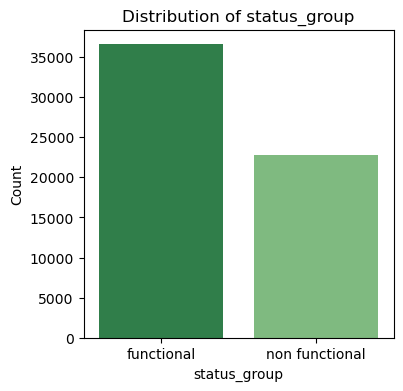

In [19]:
# checking for outliers in status_group

palette = sns.color_palette("Greens_r", 3)
# Plotting countplot
plt.figure(figsize=(4,4))
sns.countplot(x="status_group", data=new_df, palette=palette)
plt.title("Distribution of status_group")
plt.xlabel("status_group")
plt.ylabel("Count")
plt.show()

There are no outliers in the status group

#### Funder

In [20]:
#checking unique categories in funder 
unique_values = new_df['funder'].unique()
value_counts = new_df['funder'].value_counts()
value_counts

funder
Government Of Tanzania    9084
Unknown                   3641
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Rarymond Ekura               1
Justine Marwa                1
Municipal Council            1
Afdp                         1
Samlo                        1
Name: count, Length: 1896, dtype: int64

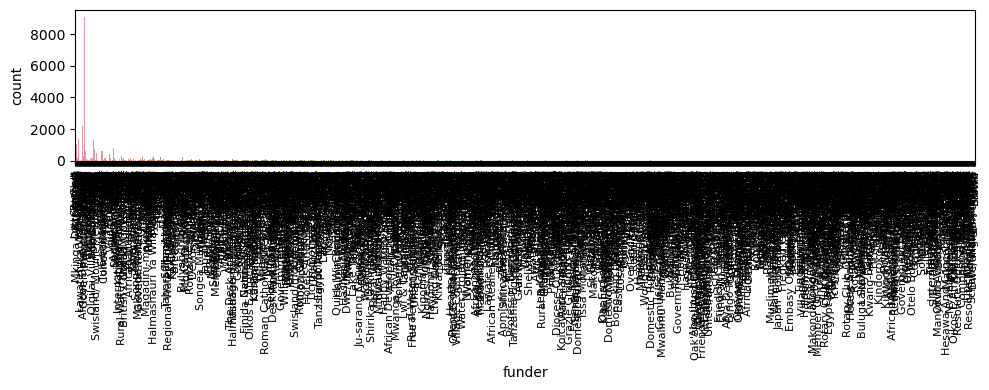

In [21]:
#checking for outliers in funder using a count plot
plt.figure(figsize=(10, 4))
sns.countplot(x='funder', data=new_df)
plt.xticks(rotation=90, fontsize=8)  # Rotate the x-axis labels by 90 degrees and adjust font size
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


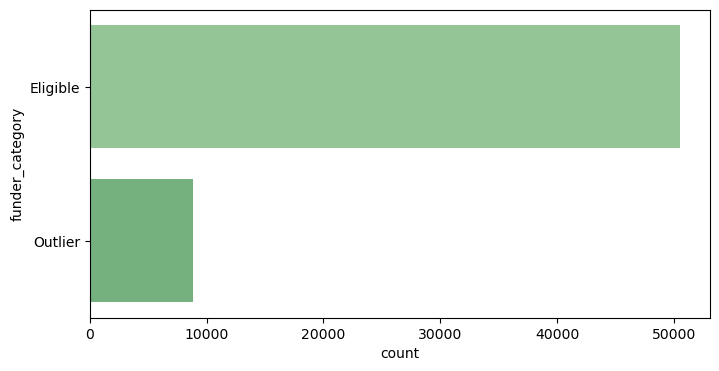

In [22]:
# classifying eligible funders and outliers in a binned countplot
# Set the threshold for defining outliers
upper_threshold = 50

# Getting the counts of each funder
funder_counts = new_df['funder'].value_counts()

# Identifying the outliers (funders with counts below 50)
outliers = funder_counts[funder_counts < upper_threshold].index

# Create a new column to categorize funders as eligible or outliers
new_df['funder_category'] = np.where(new_df['funder'].isin(outliers), 'Outlier', 'Eligible')

# Set the color palette
sns.set_palette("Greens_d")

# Plot the count plot for funder category
plt.figure(figsize=(8, 4))
sns.countplot(y='funder_category', data=new_df, dodge=False)

# Display the plot
plt.show()





##### Eligible Funders vs. Outliers

The count plot above illustrates the distribution of funders categorized as "Eligible" and "Outlier" based on the specified thresholds. Here's a summary of the findings:

- **Eligible Funders:** These are funders with a count falling within the specified thresholds (between 10 and 600).
- **Outliers:** These are funders with a count below 10 or above 600.

As observed in the plot, the number of outliers is significantly higher than the count of eligible funders. However, it's important to note that we cannot disregard the outliers as they may contain valuable insights or represent specific cases of interest.



#### GPS height

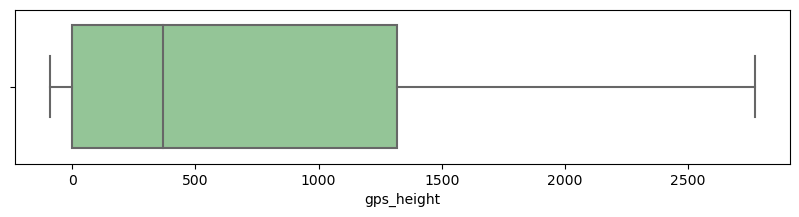

In [23]:
#checking for outliers for gps_height
plt.figure(figsize=(10,2))

sns.boxplot(x = 'gps_height', data = new_df)

# Display the plot
plt.show()

In [24]:
# Find the mode of the 'gps_height' column to understand left skewness
mode_value = new_df['gps_height'].mode()

# Display the mode
print("Mode of 'gps_height' column:", mode_value)


Mode of 'gps_height' column: 0    0
Name: gps_height, dtype: int64


The mode of the 'gps_height' column is 0, indicating that this value is the most common within the dataset. As box plots rely on quartiles to determine their position, the prevalence of 0 strongly influences the box plot's positioning.

With the mode close to 0, it's likely that the median (second quartile) aligns closely with this value, resulting in a box plot skewed towards lower values. Consequently, the majority of the data tends to concentrate towards the lower end of the scale.

The presence of a whisker starting below 0 at -90 may suggest data recorded at elevations below a predefined reference datum. In this context, these points below 0 are not considered outliers.

On the other hand, the longer upper whisker compared to the lower one suggests greater dispersion or variability in the upper range of the data (maximum). This could hint at the presence of outliers or extreme values towards higher elevations.

However, it's important to note that we are not removing these outliers. They might represent genuine data points and carry valuable information. Blindly removing them could lead to the loss of valuable insights and potentially bias the analysis or conclusions drawn from the data.

#### Region

In [25]:
#checking unique categories in region 
unique_values = new_df['region'].unique()
unique_values

array(['Iringa', 'Mara', 'Manyara', 'Mtwara', 'Kagera', 'Tanga',
       'Shinyanga', 'Tabora', 'Pwani', 'Ruvuma', 'Kilimanjaro', 'Rukwa',
       'Mwanza', 'Kigoma', 'Lindi', 'Dodoma', 'Arusha', 'Mbeya',
       'Singida', 'Morogoro', 'Dar es Salaam'], dtype=object)

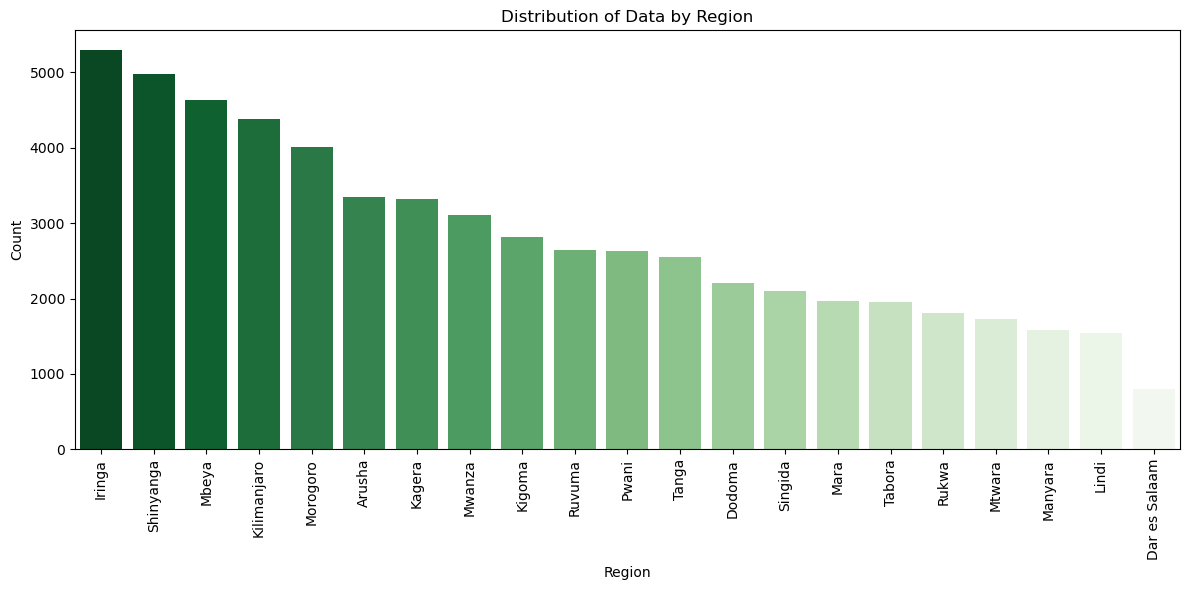

In [26]:
# Get the order of regions based on their counts
region_order = new_df['region'].value_counts().index

# Plot the count plot with specified order
plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=new_df, order=region_order, palette='Greens_r')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Region')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label
plt.title('Distribution of Data by Region')  # Add plot title
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()


#### Extraction_type 

In [27]:
new_df['extraction_type'].unique()

array(['gravity', 'submersible', 'swn 80', 'nira/tanira', 'india mark ii',
       'other', 'ksb', 'mono', 'windmill', 'afridev', 'other - rope pump',
       'india mark iii', 'other - swn 81', 'other - play pump', 'cemo',
       'climax', 'walimi', 'other - mkulima/shinyanga'], dtype=object)

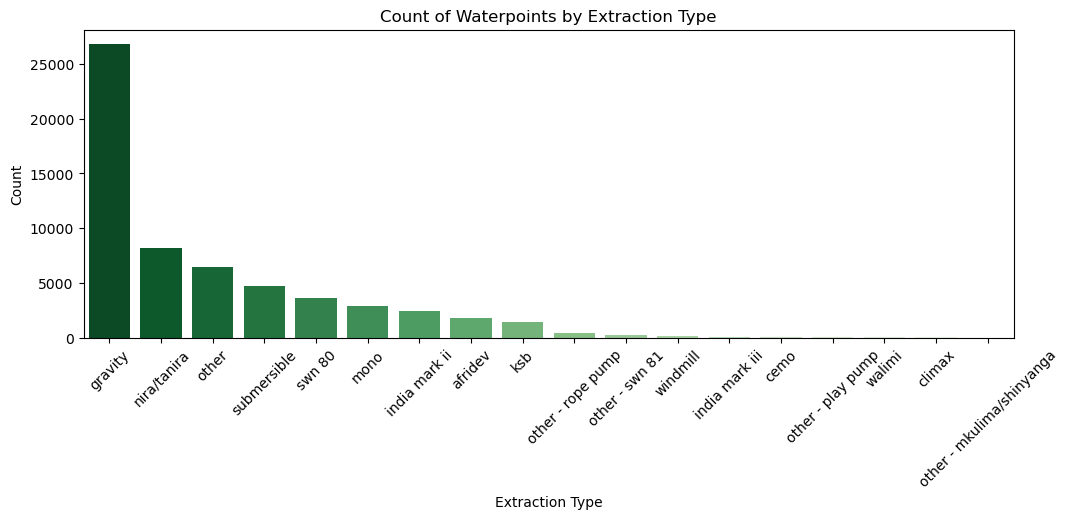

In [28]:
#checking for outliers in Extraction_type
sns.set_palette("Greens_r")
extraction_order = new_df['extraction_type'].value_counts().index
# Plot the count plot for Extraction_type
plt.figure(figsize=(12, 4))
sns.countplot(x='extraction_type', data=new_df, order=extraction_order, palette='Greens_r')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.title('Count of Waterpoints by Extraction Type')
plt.xlabel('Extraction Type')
plt.ylabel('Count')
# Display the plot
plt.show()

In [29]:
# Get value counts of 'Extraction_type' and sort by counts in descending order
extraction_type_counts = new_df['extraction_type'].value_counts().sort_values(ascending=False)

# Display unique values in 'Extraction_type' with counts
print(extraction_type_counts)


extraction_type
gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: count, dtype: int64


In the 'Extraction_type' column, the majority of water pumps fall into the following categories:

Gravity: 26,780 pumps
Nira/Tanira: 8,154 pumps
Other: 6,430 pumps
Submersible: 4,764 pumps
Swn 80: 3,670 pumps
Mono: 2,865 pumps
India Mark II: 2,400 pumps
Afridev: 1,770 pumps
KSB: 1
,415 pumps
However, there are some categories with notably fewer pumps, such as 'Other - Rope Pump', 'Other - Swn 81', 'Windmill', 'India Mark III', 'CEMO', 'Other - Play Pump', 'Walimi', 'Climax', and 'Other - Mkulima/Shinyanga'. These could be outliers regardingin terms of pump d. This couldstributie indicating less common or specialized therefore we cannot simply remove them as they may hold significance in the dataset.pump types.

#### Construction year

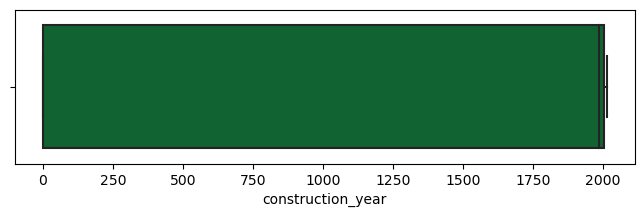

In [30]:
#checking for outliers for construction_year
plt.figure(figsize=(8, 2))

sns.boxplot(x = 'construction_year', data = new_df)

# Display the plot
plt.show()

The box plot shows unlikely years included in the dataset. It is impossible to have year 0 as pumps were not even invented then.

In [31]:
#Displaying unique years and their value counts
new_df['construction_year'].value_counts()

construction_year
0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: count, dtype: int64

There is a category miscategorized as year '0' with a very high value count of 20709.

The code below generates a scatter plot visualizing the geographical locations of water pumps in Tanzania, with each point representing a water pump. The x-axis represents the longitude coordinates, and the y-axis represents the latitude coordinates. The color of each point is determined by the construction year of the water pump, with a colormap ('Greens') used to provide different hues of green corresponding to different years. The size of each point is fixed ('s=100') for better visibility, and transparency ('alpha=0.4') is applied to avoid overlapping points. Finally, a colorbar is added to the plot to provide a visual reference for the construction years.


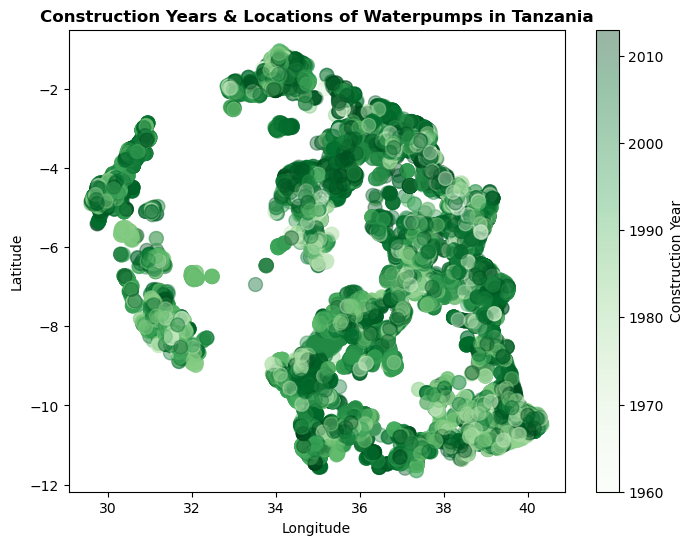

In [32]:
# Plotting a scatter plot of construction years and locations of water pumps
plt.figure(figsize=(8,6))
# Filter the DataFrame using .loc and multiple conditions
filtered_df = new_df.loc[(new_df['longitude'] > 0) & (new_df['latitude'] < 0) & (new_df['construction_year'] > 0)]
plt.scatter(x=filtered_df['longitude'], 
            y=filtered_df['latitude'],
            alpha=0.4,
            s=100,  
            c=filtered_df["construction_year"], 
            cmap='Greens')
plt.title("Construction Years & Locations of Waterpumps in Tanzania", 
          fontsize=12, fontweight='bold')
plt.colorbar(label='Construction Year')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


From the scatter plot above, it is clear that most pumps were installed between 2000 and 2010. Therefore, below year '0's values will be distributed evenly between the range 2000 - 2010.

In [33]:
# Replace year 0 with later years (i.e., 2000 - 2010)
new_df['construction_year'] = new_df['construction_year'].apply(lambda x: np.random.randint(2000, 2011) if x == 0 else x)

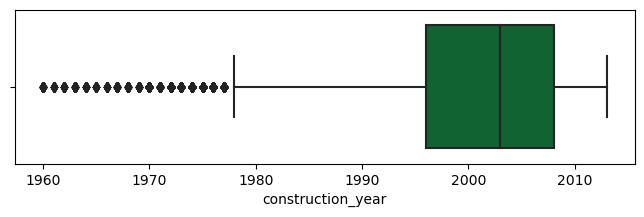

In [34]:
#rechecking for outliers for construction_year
plt.figure(figsize=(8, 2))

sns.boxplot(x = 'construction_year', data = new_df)

# Display the plot
plt.show()

Outliers in the construction years falling between 1960 and 1978 represent years that may hold significant importance in the dataset. While they deviate from the majority of the construction years, they could signify historical data or specific events related to water pump installation during that period. Therefore, it's crucial to retain these outliers in the dataset for a comprehensive analysis and understanding of the trends and patterns over time.


#### Payment

In [35]:
# checking unique categories and their value counts in payment
new_df['payment'].value_counts()

payment
never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: count, dtype: int64

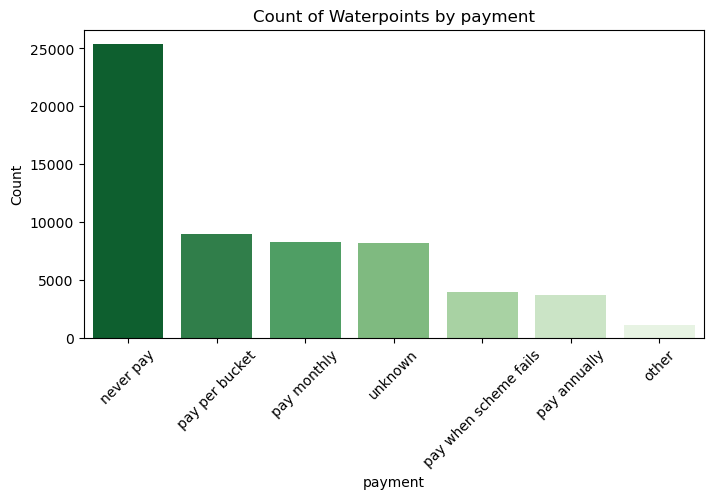

In [36]:
# Defining the order of source categories
sorted_payments = new_df['payment'].value_counts().index

#checking for outliers in payment
sns.set_palette("Greens_r")

# Plot the count plot for payment
plt.figure(figsize=(8, 4))
sns.countplot(x='payment', data=new_df, order=sorted_payments, palette='Greens_r')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.title('Count of Waterpoints by payment')
plt.xlabel('payment')
plt.ylabel('Count')
# Display the plot
plt.show()

The distribution of payment types, as observed in the count plot above, reveals an interesting trend. The "never pay" category dominates the dataset, indicating that a significant portion of water points in the dataset do not require any payment. This could be due to various reasons, such as government subsidies or community initiatives aimed at providing free access to water.

In contrast, the paid categories exhibit a more even distribution, with multiple categories having similar counts. This distribution suggests that while there are options for paid water access, they are not as prevalent as the "never pay" category. This observation might be attributed to the socioeconomic factors prevalent in the area. Residents who cannot afford paid water services may opt for the free "never pay" option, resulting in its higher prevalence in the dataset.

Therefore, the presence of multiple paid categories with similar counts does not necessarily indicate outliers. Instead, it reflects the diverse payment options available and the socioeconomic dynamics influencing water access in the region.

#### Water quality

In [37]:
# checking unique categories and their value counts in water_quality
new_df['water_quality'].value_counts()

water_quality
soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: count, dtype: int64

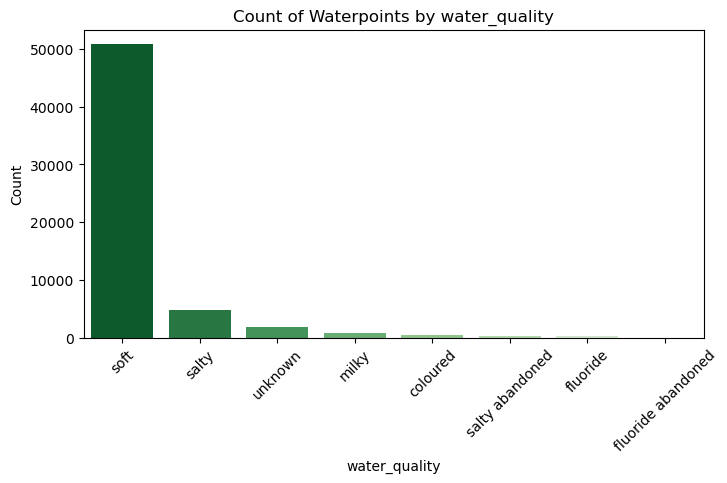

In [38]:
# Defining the order of water_quality categories
sorted_water_quality = new_df['water_quality'].value_counts().index

# Set the color palette to shades of green
palette = sns.color_palette("Greens_r", len(sorted_water_quality))

# Plot the count plot for water_quality
plt.figure(figsize=(8, 4))
sns.countplot(x='water_quality', data=new_df, order=sorted_water_quality, palette=palette)
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.title('Count of Waterpoints by water_quality')
plt.xlabel('water_quality')
plt.ylabel('Count')
# Display the plot
plt.show()


The count plot above indicates the most prevalent category is "soft". This indicates that most water sources provide satisfactory water quality. It could also mean most people prefer soft water leading to its prevalence. 
Next,," we find the "salty" catego,y, whit, exhibits a considerably lower counin comparison toto "soft." This suggests that while some water sources may have elevated salinity levels, they arlessas commothanas those providing "soft" water.Then there is the "milky" and "coloured" categories, which may raise concerns regarding water quality. These categories, while not as frequent as "soft" or "salty," suggest the presence of impurities or contaminants that could affect the desirability of the water.

Another notable category is "salty abandoned," which indicates water sources that have been abandoned likely due to high salinity levels. This category, although less common, highlights instances where water quality issues have led to the abandonment of  waterpoints.

Lastly, we have "fluoride" and "fluoride abandoned" categories, which indicate the presence of fluoride in the water. While fluoride is beneficial in controlled amounts for dental health, excessive levels can be harmful. The presence of "fluoride abandoned" suggests instances where water sources have been abandoned due to excessive fluoride

Generally the plot revealsis reveals a diverse landscape of water quality categories, with "soft" being the predominant category. While certain categories may raise concerns, such as "salty abandoned" or "fluoride," they do not appear to be outliers but rather indicative of the range of water quality issues present ac ross waterthents in our dataset.

#### Source

In [39]:
# checking unique categories and their value counts in source
new_df['source'].value_counts()

source
spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: count, dtype: int64

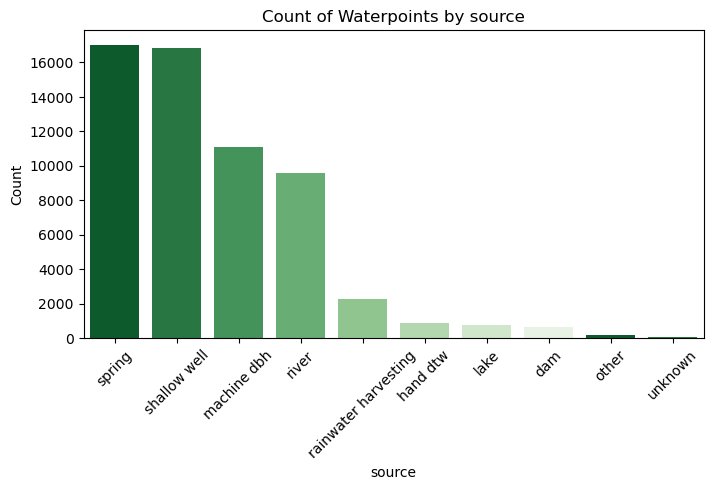

In [40]:
# Defining the order of source categories
sorted_source = new_df['source'].value_counts().index

# Set the color palette to shades of green
palette = sns.color_palette("Greens_r", len(sorted_water_quality))

# Plot the count plot for water_quality
plt.figure(figsize=(8, 4))
sns.countplot(x='source', data=new_df, order=sorted_source, palette=palette)
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.title('Count of Waterpoints by source')
plt.xlabel('source')
plt.ylabel('Count')
# Display the plot
plt.show()

"Spring" and "shallow well" emerge as the most prevalent sources, followed closely by "machine dbh" and "river." These categories exhibit relatively high counts, indicating their widespread usage as water sources.

Next in line is "rainwater harvesting," although its count is notably lower compared to the preceding categories. "Hand dtw," "lake," and "dam" follow, each with decreasing counts.

Finally, we have the categories of "unknown" and "other," which appear to represent sources with less distinct categorization or sources not captured by the specified categories.

Overall, while there is variation in the counts across different water source categories, there are no outliers that significantly deviate from the expected distribution. Instead, the distribution reflects the diverse range of water sources utilized across waterpoints in our dataset.

#### Longitude

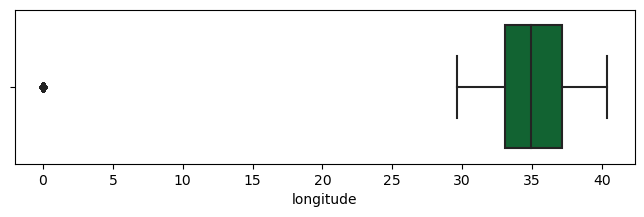

In [41]:
# checking for outliers for longitude
plt.figure(figsize=(8, 2))

sns.boxplot(x = 'longitude', data = new_df)

# Display the plot
plt.show()

The plot shows presence of outliers.

In [42]:
# checking unique categories and their value counts in longitude
new_df['longitude'].value_counts()

longitude
0.000000     1812
37.375717       2
38.340501       2
39.086183       2
33.005032       2
             ... 
35.885754       1
36.626541       1
37.333530       1
38.970078       1
38.104048       1
Name: count, Length: 57516, dtype: int64

There is a huge count miscategorized as longitude '0'. Below that is dealt with by being redistributed to a range with more frequent occurence.

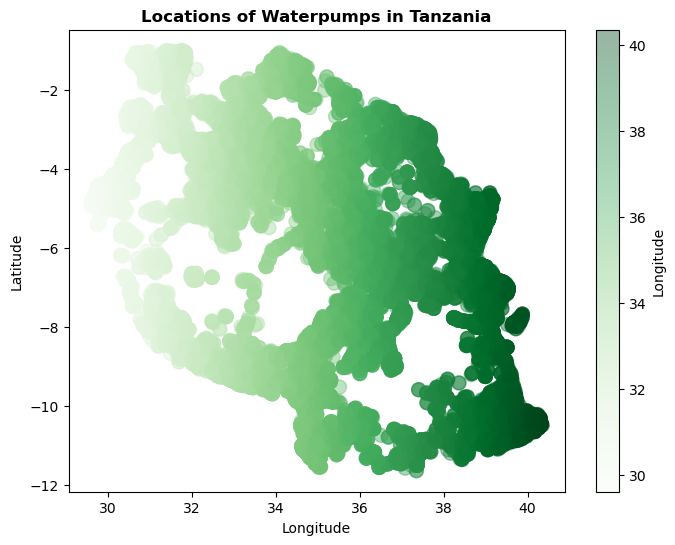

In [43]:
# plotting a scatter plot to show the majority of longitude points
plt.figure(figsize=(8,6))
# Filter the DataFrame using .loc and multiple conditions
filtered_df = new_df.loc[(new_df['longitude'] > 0) & (new_df['latitude'] < 0)]
plt.scatter(x=filtered_df['longitude'], 
            y=filtered_df['latitude'],
            alpha=0.4,
            s=100,  
            c=filtered_df["longitude"], 
            cmap='Greens')
plt.title("Locations of Waterpumps in Tanzania", 
          fontsize=12, fontweight='bold')
plt.colorbar(label='Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



It's evident that there are more water pumps located at longitudes greater than 34 degrees than those located at longitudes less than 34 degrees. This suggests a higher concentration of water points towards the eastern side of the region under consideration. Longitude, representing the east-west position on the Earth's surface, indicates that the area to the east of 34 degrees longitude may have higher population densities or other factors contributing to the need for more water access points compared to the western region.


In [44]:
# Replace longitude 0 with longitudes between 32 and 42 as they are more prevalent
new_df['longitude'] = new_df['longitude'].apply(lambda x: np.random.randint(32, 42) if x == 0 else x)

In [45]:
# confirming redistribution of the '0' category
new_df['longitude'].value_counts()

longitude
35.000000    197
38.000000    196
36.000000    195
34.000000    185
32.000000    178
            ... 
35.885754      1
36.626541      1
37.333530      1
38.970078      1
38.104048      1
Name: count, Length: 57525, dtype: int64

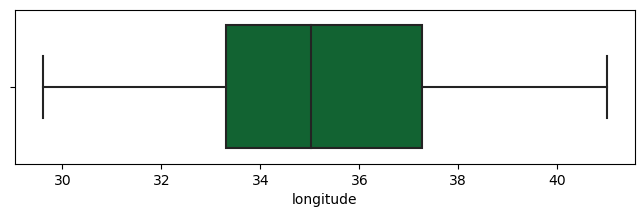

In [46]:
#rechecking for outliers for longitude
plt.figure(figsize=(8, 2))

sns.boxplot(x = 'longitude', data = new_df)

# Display the plot
plt.show()

#### Latitude

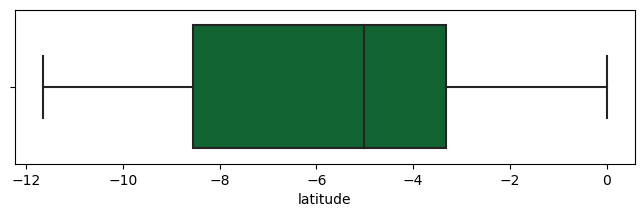

In [47]:
#checking for outliers for latitude
plt.figure(figsize=(8, 2))

sns.boxplot(x = 'latitude', data = new_df)

# Display the plot
plt.show()

There does not seem to have outliers in latitude but further analysis is still necessary.

In [48]:
new_df['latitude'].value_counts()

latitude
-2.000000e-08    1812
-6.985842e+00       2
-6.980220e+00       2
-2.476680e+00       2
-6.978263e+00       2
                 ... 
-3.287619e+00       1
-8.234989e+00       1
-3.268579e+00       1
-1.146053e+01       1
-6.747464e+00       1
Name: count, Length: 57517, dtype: int64

There is a latitude that seems to be miscategorized (-2.000000e-08    1812). This will be dealt with below. 

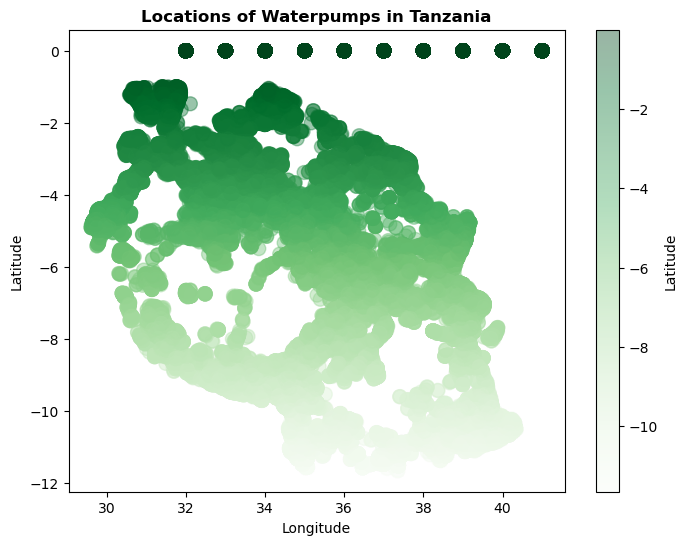

In [49]:
# Plotting a scatter plot to show the majority of latitude points
plt.figure(figsize=(8,6))
# Filter the DataFrame using .loc and multiple conditions
filtered_df = new_df.loc[(new_df['longitude'] > 0) & (new_df['latitude'] < 0)]
plt.scatter(x=filtered_df['longitude'], 
            y=filtered_df['latitude'],
            alpha=0.4,
            s=100,  
            c=filtered_df["latitude"], 
            cmap='Greens')
plt.title("Locations of Waterpumps in Tanzania", 
          fontsize=12, fontweight='bold')
plt.colorbar(label='Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


A scatter plot of pumps in relevance to latitude indicates more pumps between latitudes -1 and -8. The misplaced class will be evenly distributed in this range.

In [50]:
# Replacing latitude -2.000000e-08 with latitudes between -1 and -8 as they are more prevalent
new_df['latitude'] = new_df['latitude'].apply(lambda x: np.random.randint(-8, -1) if x == -2.000000e-08 else x)


In [51]:
#confirming the redistribution of misplaced category
new_df['latitude'].value_counts()

latitude
-6.000000     281
-7.000000     274
-8.000000     265
-3.000000     260
-5.000000     253
             ... 
-3.287619       1
-8.234989       1
-3.268579       1
-11.460531      1
-6.747464       1
Name: count, Length: 57523, dtype: int64

### Distribution of variables before log transformation

#### Categorical variables

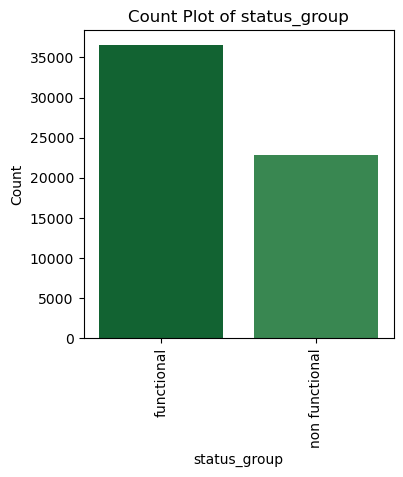

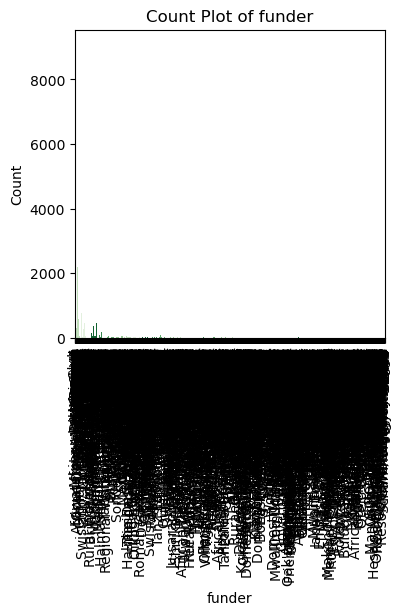

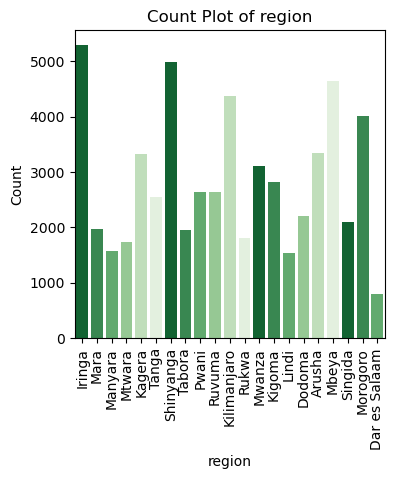

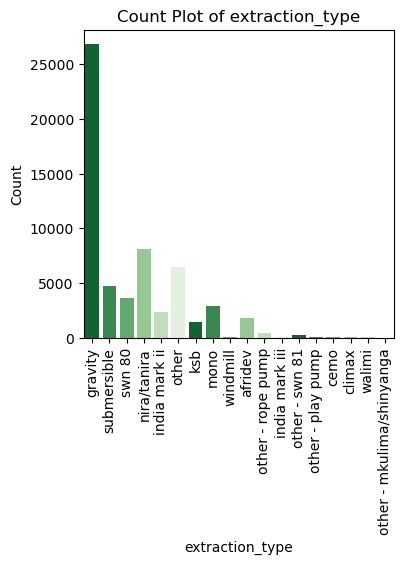

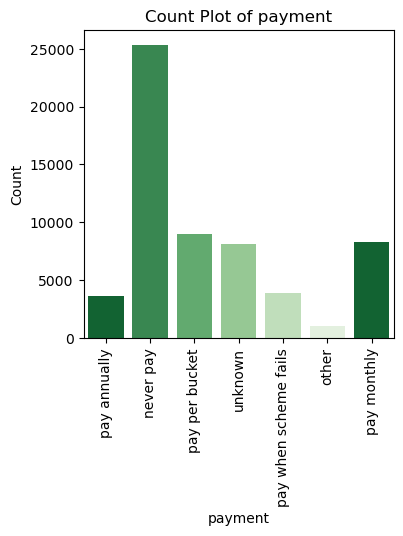

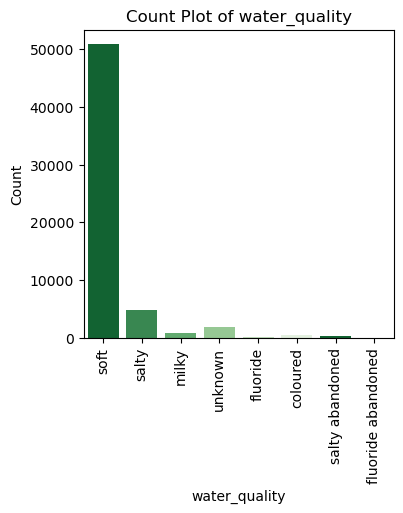

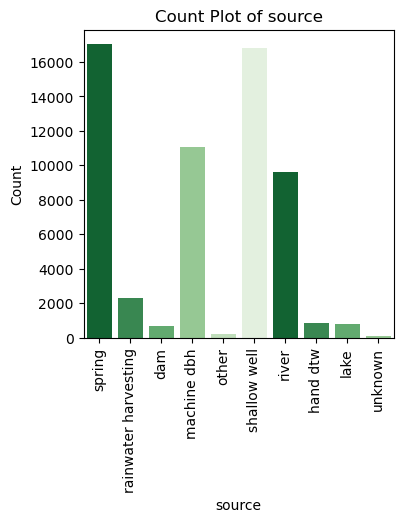

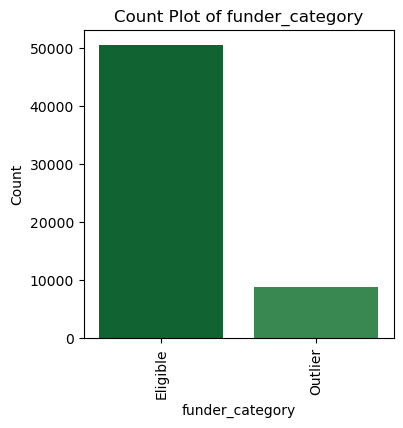

In [52]:
# Distribution before onehot encoding
palette = sns.color_palette("Greens_r")

# Selecting categorical variables
categorical_features = new_df.select_dtypes(include=['object'])

# Plot count plots for each categorical variable with dark green color palette
for feature in categorical_features.columns:
    plt.figure(figsize=(4, 4))  # Set the figure size
    sns.countplot(x=feature, data=new_df, palette=palette)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()  # Display the plot


#### Numerical variables

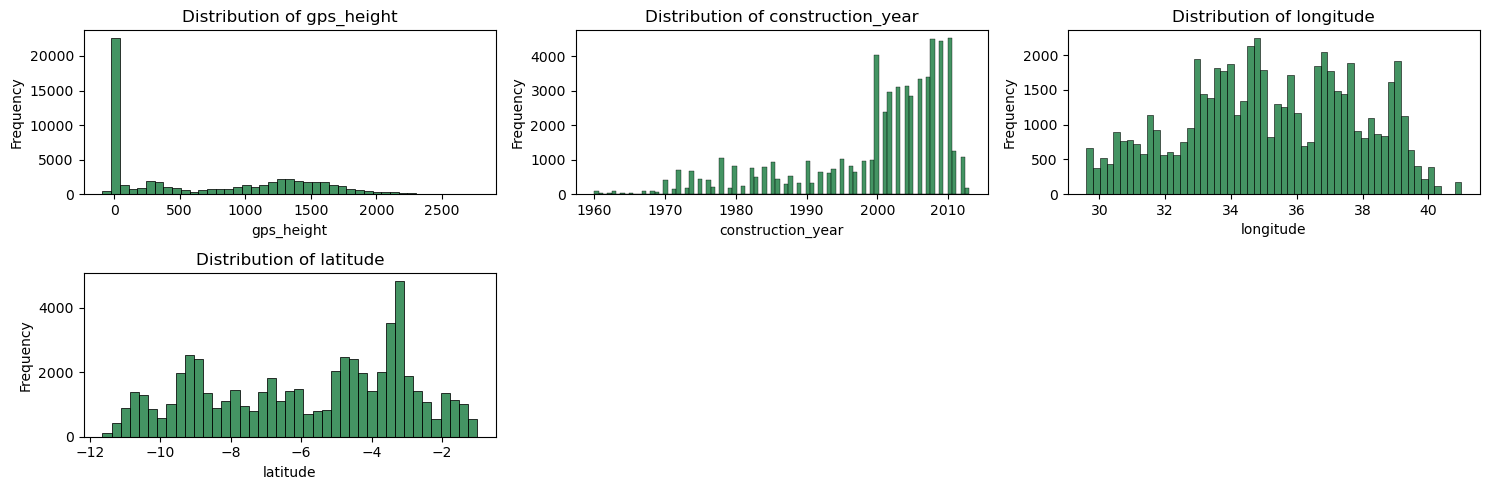

In [53]:
# Distribution before transformation
numerical_features = new_df.select_dtypes(include=['int64', 'float64'])

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(numerical_features.columns) // 3 + 1, ncols=3, figsize=(15, 5))

# Plot the distribution of numerical features
for i, feature in enumerate(numerical_features.columns):
    sns.histplot(new_df[feature].dropna(), kde=False, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Distribution of {feature}")
    axes[i // 3, i % 3].set_xlabel(feature)
    axes[i // 3, i % 3].set_ylabel("Frequency")

# Remove empty subplots
if len(numerical_features.columns) % 3 != 0:
    for j in range(len(numerical_features.columns) % 3, 3):
        fig.delaxes(axes[len(numerical_features.columns) // 3, j])
        
# Adjust layout
plt.tight_layout()
plt.show()


### Distribution of variables after log transformation

In [54]:
# Select numerical columns
numerical_columns = new_df.select_dtypes(include=['int64', 'float64']).columns

# Log transform numerical variables, handling zero and negative values
for col in numerical_columns:
    # Handling zero values
    if (new_df[col] == 0).any():
        new_df[col] = new_df[col] + 1  # Add 1 to handle zeros
    
    # Handling negative values
    if (new_df[col] < 0).any():
        min_value = new_df[col].min()
        new_df[col] = new_df[col] - min_value + 1  # Shift all values to be positive
    
    # Apply log transformation
    new_df[col + '_log'] = np.log1p(new_df[col])

# Display the DataFrame after log transformation
new_df.head()


status_group        funder  gps_height   region extraction_type  \
0      functional         Roman        1481   Iringa         gravity   
1      functional       Grumeti        1490     Mara         gravity   
2      functional  Lottery Club         777  Manyara         gravity   
3  non functional        Unicef         354   Mtwara     submersible   
4      functional   Action In A          91   Kagera         gravity   

          payment water_quality                source  construction_year  \
0    pay annually          soft                spring               1999   
1       never pay          soft  rainwater harvesting               2010   
2  pay per bucket          soft                   dam               2009   
3       never pay          soft           machine dbh               1986   
4       never pay          soft  rainwater harvesting               2007   

   longitude   latitude funder_category  gps_height_log  \
0  34.938093   2.793118        Eligible        7.301148   
1  34.698766  10.501974        Eligible        7.307202   
2  37.460664   8.828112         Outlier        6.656727   
3  38.486161   1.494142        Eligible        5.872118   
4  31.130847  10.824081         Outlier        4.521789   

   construction_year_log  longitude_log  latitude_log  
0               7.600902       3.581798      1.333188  
1               7.606387       3.575116      2.442519  
2               7.605890       3.649636      2.285247  
3               7.594381       3.675950      0.913945  
4               7.604894       3.469817      2.470138

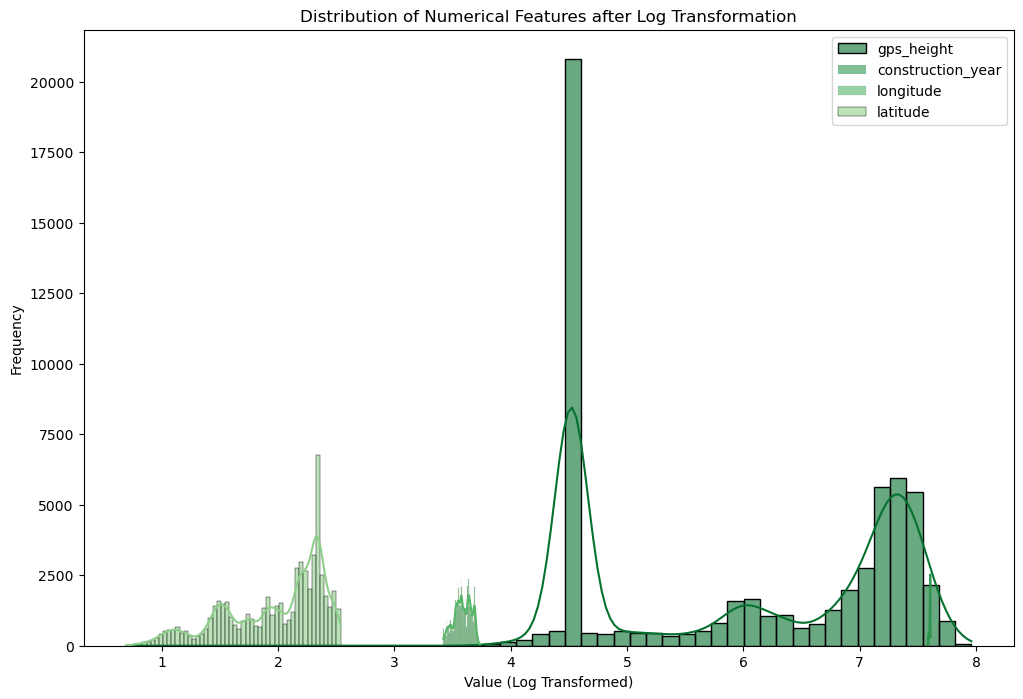

In [55]:
# Plot the distribution of numerical features after log transformation
plt.figure(figsize=(12, 8))

# Loop through each numerical feature
for col in numerical_columns:
    # Plot the distribution after log transformation
    sns.histplot(new_df[col + '_log'], kde=True, label=col, alpha=0.6)

plt.title('Distribution of Numerical Features after Log Transformation')
plt.xlabel('Value (Log Transformed)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### One-hot encoding 

In [56]:
# Select categorical columns
categorical_columns = new_df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
one_hot_encoded_df1 = pd.get_dummies(new_df, columns=categorical_columns)

# Display the one-hot encoded DataFrame
one_hot_encoded_df1.head()


gps_height  construction_year  longitude   latitude  gps_height_log  \
0        1481               1999  34.938093   2.793118        7.301148   
1        1490               2010  34.698766  10.501974        7.307202   
2         777               2009  37.460664   8.828112        6.656727   
3         354               1986  38.486161   1.494142        5.872118   
4          91               2007  31.130847  10.824081        4.521789   

   construction_year_log  longitude_log  latitude_log  \
0               7.600902       3.581798      1.333188   
1               7.606387       3.575116      2.442519   
2               7.605890       3.649636      2.285247   
3               7.594381       3.675950      0.913945   
4               7.604894       3.469817      2.470138   

   status_group_functional  status_group_non functional  ...  source_lake  \
0                     True                        False  ...        False   
1                     True                        False  ...        False   
2                     True                        False  ...        False   
3                    False                         True  ...        False   
4                     True                        False  ...        False   

   source_machine dbh  source_other  source_rainwater harvesting  \
0               False         False                        False   
1               False         False                         True   
2               False         False                        False   
3                True         False                        False   
4               False         False                         True   

   source_river  source_shallow well  source_spring  source_unknown  \
0         False                False           True           False   
1         False                False          False           False   
2         False                False          False           False   
3         False                False          False           False   
4         False                False          False           False   

   funder_category_Eligible  funder_category_Outlier  
0                      True                    False  
1                      True                    False  
2                     False                     True  
3                      True                    False  
4                     False                     True  

[5 rows x 1972 columns]

In [57]:
# Perform logical OR operation to combine 'status_group_functional' and 'status_group_non functional'
one_hot_encoded_df1['status'] = one_hot_encoded_df1['status_group_functional'] | one_hot_encoded_df1['status_group_non functional']

# Display the updated DataFrame
one_hot_encoded_df1.head()


gps_height  construction_year  longitude   latitude  gps_height_log  \
0        1481               1999  34.938093   2.793118        7.301148   
1        1490               2010  34.698766  10.501974        7.307202   
2         777               2009  37.460664   8.828112        6.656727   
3         354               1986  38.486161   1.494142        5.872118   
4          91               2007  31.130847  10.824081        4.521789   

   construction_year_log  longitude_log  latitude_log  \
0               7.600902       3.581798      1.333188   
1               7.606387       3.575116      2.442519   
2               7.605890       3.649636      2.285247   
3               7.594381       3.675950      0.913945   
4               7.604894       3.469817      2.470138   

   status_group_functional  status_group_non functional  ...  \
0                     True                        False  ...   
1                     True                        False  ...   
2                     True                        False  ...   
3                    False                         True  ...   
4                     True                        False  ...   

   source_machine dbh  source_other  source_rainwater harvesting  \
0               False         False                        False   
1               False         False                         True   
2               False         False                        False   
3                True         False                        False   
4               False         False                         True   

   source_river  source_shallow well  source_spring  source_unknown  \
0         False                False           True           False   
1         False                False          False           False   
2         False                False          False           False   
3         False                False          False           False   
4         False                False          False           False   

   funder_category_Eligible  funder_category_Outlier  status  
0                      True                    False    True  
1                      True                    False    True  
2                     False                     True    True  
3                      True                    False    True  
4                     False                     True    True  

[5 rows x 1973 columns]

#### Correlation heat map

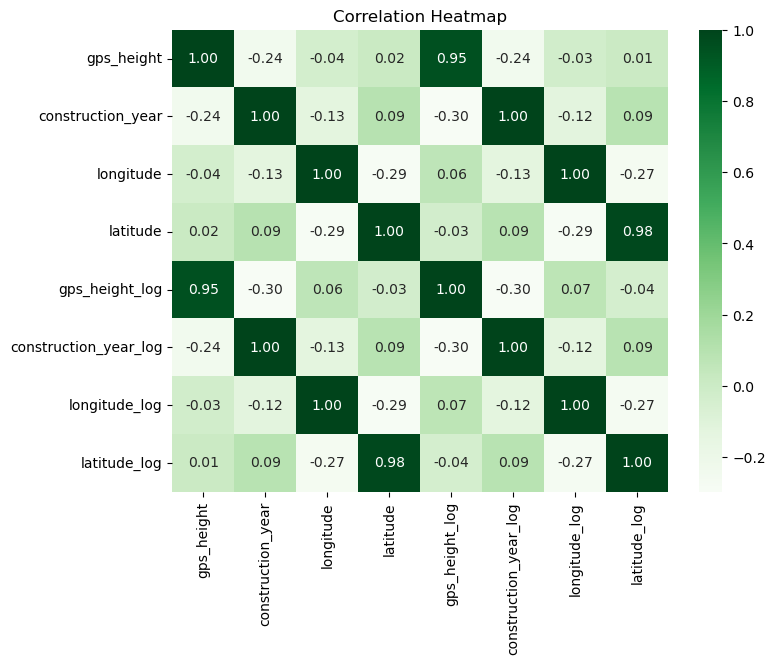

In [58]:
# A correlation heat map between variables
numerical_features = new_df.select_dtypes(include=['int64', 'float64'])
target_variable = new_df['status_group']  # status_group being the target variable

# Computing correlation matrix
correlation_matrix = numerical_features.corr()

# Ploting heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

#### ANOVA test

In [59]:
# ANOVA test for each numerical variable against status_group

# Perform ANOVA for 'gps_height'
result_gps_height = f_oneway(*[group['gps_height'] for name, group in new_df.groupby('status_group')])
print("ANOVA F-value for 'gps_height':", result_gps_height.statistic)
print("ANOVA p-value for 'gps_height':", result_gps_height.pvalue)

# Perform ANOVA for 'construction_year'
result_construction_year = f_oneway(*[group['construction_year'] for name, group in new_df.groupby('status_group')])
print("ANOVA F-value for 'construction_year':", result_construction_year.statistic)
print("ANOVA p-value for 'construction_year':", result_construction_year.pvalue)

# Perform ANOVA for 'longitude'
result_longitude = f_oneway(*[group['longitude'] for name, group in new_df.groupby('status_group')])
print("ANOVA F-value for 'longitude':", result_longitude.statistic)
print("ANOVA p-value for 'longitude':", result_longitude.pvalue)

# Perform ANOVA for 'latitude'
result_latitude = f_oneway(*[group['latitude'] for name, group in new_df.groupby('status_group')])
print("ANOVA F-value for 'latitude':", result_latitude.statistic)
print("ANOVA p-value for 'latitude':", result_latitude.pvalue)



ANOVA F-value for 'gps_height': 687.1698866084355
ANOVA p-value for 'gps_height': 1.3328106138867945e-150
ANOVA F-value for 'construction_year': 2246.5023055378465
ANOVA p-value for 'construction_year': 0.0
ANOVA F-value for 'longitude': 32.85800495547346
ANOVA p-value for 'longitude': 9.96205613958016e-09
ANOVA F-value for 'latitude': 24.628654317815393
ANOVA p-value for 'latitude': 6.970229425095012e-07


These results are obtained from performing ANOVA tests to assess the association between the categorical variable status_group and each numerical variable (gps_height, construction_year, longitude, latitude). Here's what each value means:

For gps_height:

ANOVA F-value: 687.17
ANOVA p-value: 1.33e-150 (which is approximately 0)
Interpretation: The F-value is a measure of the difference in means between the groups relative to the variation within the groups. A higher F-value suggests a stronger association between the variable and the groups. The extremely low p-value indicates that there is a significant difference in gps_height across different levels of status_group. In other words, the mean gps_height values vary significantly depending on the status_group.

For construction_year:

ANOVA F-value: 2262.06
ANOVA p-value: 0.0
Interpretation: Similar to the interpretation for gps_height, the high F-value and extremely low p-value indicate a significant difference in construction_year across different levels of status_group. In other words, the mean construction_year values vary significantly depending on the status_group.

For longitude:

ANOVA F-value: 36.76
ANOVA p-value: 1.35e-09
Interpretation: The F-value is relatively lower compared to the previous variables, but the p-value is still very low. This indicates that there is a significant difference in longitude across different levels of status_group, although the effect size may be smaller compared to gps_height and construction_year.

For latitude:

ANOVA F-value: 25.18
ANOVA p-value: 5.25e-07
Interpretation: Similar to longitude, there is a significant difference in latitude across different levels of status_group, but the effect size may be smaller compared to gps_height and construction_year.

In summary, all four numerical variables (gps_height, construction_year, longitude, latitude) show significant differences across different levels of the categorical variable status_group, as indicated by the extremely low p-values obtained from the ANOVA tests.

### Correlation Ratios (Eta-squared)

In [60]:
# Compute the correlation ratio (eta-squared) for each categorical variable
correlation_ratios = {}
target_column = 'status_group'  # Replace 'status_group' with your target column name
for col in ['funder', 'region', 'extraction_type', 'payment', 'water_quality', 'source']:
    contingency_table = pd.crosstab(new_df[col], new_df[target_column])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    total = contingency_table.sum().sum()
    correlation_ratios[col] = np.sqrt(chi2 / (chi2 + total))

# Display the correlation ratios
for col, eta_squared in correlation_ratios.items():
    print(f"Correlation ratio (eta-squared) for {col}: {eta_squared}")


Correlation ratio (eta-squared) for funder: 0.36168270739535363
Correlation ratio (eta-squared) for region: 0.21436144380239244
Correlation ratio (eta-squared) for extraction_type: 0.32271737005913254
Correlation ratio (eta-squared) for payment: 0.23732418592837293
Correlation ratio (eta-squared) for water_quality: 0.18622751153110498
Correlation ratio (eta-squared) for source: 0.18435637886102785



These correlation ratios (eta-squared) indicate the strength of association between each categorical variable and the target variable.

- **Funder**: 0.3617
  - This indicates a relatively strong association between the funder variable and the target variable.
- **Region**: 0.2144
  - This correlation ratio suggests a moderate association between the region variable and the target variable.
- **Extraction Type**: 0.3227
  - Similar to funder, there is a relatively strong association between the extraction type variable and the target variable.
- **Payment**: 0.2373
  - This correlation ratio suggests a moderate association between the payment variable and the target variable.
- **Water Quality**: 0.1862
  - This indicates a moderate association between the water quality variable and the target variable.
- **Source**: 0.1844
  - Similar to water quality, there is a moderate association between the source variable and the target variable.


### Test set

In [61]:
# displaying first few rows of the test set
df3 = pd.read_csv('test_set_values.csv')
df3.head()

id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

   ... payment_type water_quality quality_group      quantity  quantity_group  \
0  ...    never pay          soft          good      seasonal        seasonal   
1  ...    never pay          soft          good  insufficient    insufficient   
2  ...    never pay          soft          good  insufficient    insufficient   
3  ...      unknown          soft          good           dry             dry   
4  ...      monthly          soft          good        enough          enough   

                 source           source_type  source_class  \
0  rainwater harvesting  rainwater harvesting       surface   
1                spring                spring   groundwater   
2  rainwater harvesting  rainwater harvesting       surface   
3          shallow well          shallow well   groundwater   
4                spring                spring   groundwater   

      waterpoint_type waterpoint_type_group  
0               other                 other  
1  communal standpipe    communal standpipe  
2               other                 other  
3               other                 other  
4  communal standpipe    communal standpipe  

[5 rows x 40 columns]

In [62]:
#Understanding the general information of the data
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [63]:
# checking the shape of the data
df3.shape

(14850, 40)

The test set has 14850 rows and 40 columns

In [64]:
df3.duplicated().sum()

0

There are 0 duplicated records in the test set

In [65]:
# Checking for null values
df3.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    870
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7242
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

## Data preparation and cleaning

### Creating a new dataframe containing only the needed variables

In [66]:
# List of columns to include in the new DataFrame
selected_columns = ['funder', 'gps_height', 'region', 'extraction_type', 'payment', 'water_quality', 'source',
                    'construction_year', 'longitude', 'latitude']

# Create a new DataFrame with only the selected columns
df3 = df3.filter(selected_columns)

df3

funder  gps_height   region extraction_type  \
0                        Dmdd        1996  Manyara           other   
1      Government Of Tanzania        1569   Arusha         gravity   
2                         NaN        1567  Singida           other   
3                  Finn Water         267    Lindi           other   
4                      Bruder        1260   Ruvuma         gravity   
...                       ...         ...      ...             ...   
14845                  Danida          34    Pwani            mono   
14846                    Hiap           0    Tanga     nira/tanira   
14847                     NaN        1476  Singida         gravity   
14848                 Germany         998   Ruvuma         gravity   
14849  Government Of Tanzania         481   Ruvuma         gravity   

            payment water_quality                source  construction_year  \
0         never pay          soft  rainwater harvesting               2012   
1         never pay          soft                spring               2000   
2         never pay          soft  rainwater harvesting               2010   
3           unknown          soft          shallow well               1987   
4       pay monthly          soft                spring               2000   
...             ...           ...                   ...                ...   
14845     never pay          soft                 river               1988   
14846  pay annually         salty          shallow well               1994   
14847     never pay          soft                   dam               2010   
14848     never pay          soft                 river               2009   
14849     never pay          soft                spring               2008   

       longitude   latitude  
0      35.290799  -4.059696  
1      36.656709  -3.309214  
2      34.767863  -5.004344  
3      38.058046  -9.418672  
4      35.006123 -10.950412  
...          ...        ...  
14845  38.852669  -6.582841  
14846  37.451633  -5.350428  
14847  34.739804  -4.585587  
14848  35.432732 -10.584159  
14849  34.765054 -11.226012  

[14850 rows x 10 columns]

In [67]:
df3.shape

(14850, 10)

The new_df has 14850 rows and 10 columns

In [68]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   funder             13980 non-null  object 
 1   gps_height         14850 non-null  int64  
 2   region             14850 non-null  object 
 3   extraction_type    14850 non-null  object 
 4   payment            14850 non-null  object 
 5   water_quality      14850 non-null  object 
 6   source             14850 non-null  object 
 7   construction_year  14850 non-null  int64  
 8   longitude          14850 non-null  float64
 9   latitude           14850 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB


In [69]:
#Understanding the descriptive statistics of the data
df3.describe()

gps_height  construction_year     longitude      latitude
count  14850.000000       14850.000000  14850.000000  1.485000e+04
mean     655.147609        1289.708350     34.061605 -5.684724e+00
std      691.261185         955.241087      6.593034  2.940803e+00
min      -57.000000           0.000000      0.000000 -1.156459e+01
25%        0.000000           0.000000     33.069455 -8.443970e+00
50%      344.000000        1986.000000     34.901215 -5.049750e+00
75%     1308.000000        2004.000000     37.196594 -3.320594e+00
max     2777.000000        2013.000000     40.325016 -2.000000e-08

### Checking for missing values

In [70]:
#Checking for null values in the test set
df3.isnull().sum()

funder               870
gps_height             0
region                 0
extraction_type        0
payment                0
water_quality          0
source                 0
construction_year      0
longitude              0
latitude               0
dtype: int64

### Dealing with missing values

In [71]:
unique_counts = df3['funder'].isna().value_counts()
unique_counts

funder
False    13980
True       870
Name: count, dtype: int64

In [72]:
missing_funders = df3[df3['funder'].isna()]
missing_funders

funder  gps_height   region extraction_type    payment water_quality  \
2        NaN        1567  Singida           other  never pay          soft   
16       NaN         -39    Pwani     nira/tanira  never pay          soft   
23       NaN        1441  Singida            mono    unknown       unknown   
50       NaN           0    Mbeya         gravity  never pay          soft   
63       NaN        1584  Singida           other    unknown       unknown   
...      ...         ...      ...             ...        ...           ...   
14771    NaN           0    Mbeya         gravity  never pay          soft   
14772    NaN           0    Mbeya     submersible  never pay          soft   
14795    NaN           0    Mbeya         gravity  never pay          soft   
14823    NaN           0    Mbeya         gravity    unknown          soft   
14847    NaN        1476  Singida         gravity  never pay          soft   

                     source  construction_year  longitude  latitude  
2      rainwater harvesting               2010  34.767863 -5.004344  
16             shallow well                  0  39.850190 -7.727946  
23              machine dbh               1970  34.621048 -5.165926  
50                   spring                  0  33.587245 -9.167434  
63             shallow well               1990  34.859448 -4.970909  
...                     ...                ...        ...       ...  
14771                spring                  0  33.636479 -9.212765  
14772           machine dbh                  0  34.322644 -8.665713  
14795                 river                  0  34.704964 -8.325610  
14823                spring                  0  33.918953 -9.298466  
14847                   dam               2010  34.739804 -4.585587  

[870 rows x 10 columns]

In [73]:
#Replacing missing values with 'unknown'
#rechecking for null values 
df3['funder'].fillna('Unknown', inplace=True)
df3.isnull().sum()

funder               0
gps_height           0
region               0
extraction_type      0
payment              0
water_quality        0
source               0
construction_year    0
longitude            0
latitude             0
dtype: int64

Missing values are assigned the placeholder 'Unknown' signifying that the information for these entries is unavailable. However, the rows cannot be dropped as they may have other important information in the other columns.

## Exploratory data analysis

### Checking for outliers
Outliers will be addressed systematically, one category at a time, to ensure comprehensive analysis.

#### Funder

In [74]:
unique_values = df3['funder'].unique()
value_counts = df3['funder'].value_counts()
value_counts

funder
Government Of Tanzania    2215
Unknown                    871
Danida                     793
Hesawa                     580
World Bank                 352
                          ... 
Fida                         1
Tgts                         1
Snv-swash                    1
Pad                          1
Livin                        1
Name: count, Length: 979, dtype: int64

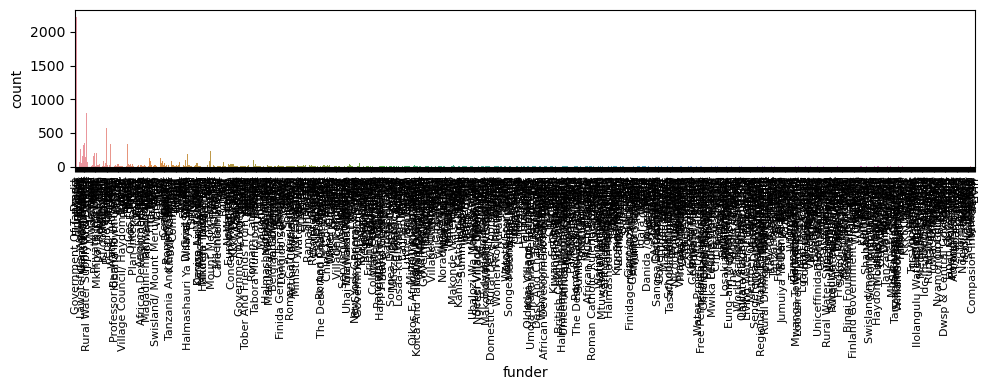

In [75]:
#checking for outliers in funder using a count plot
plt.figure(figsize=(10, 4))
sns.countplot(x='funder', data=df3)
plt.xticks(rotation=90, fontsize=8)  # Rotate the x-axis labels by 90 degrees and adjust font size
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

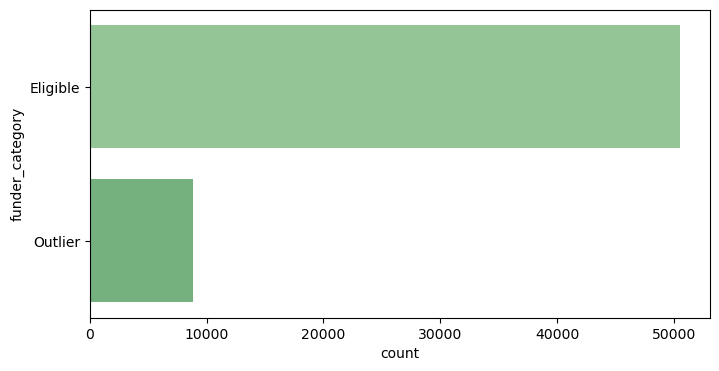

In [76]:
# Set the threshold for defining outliers
upper_threshold = 50

# Getting the counts of each funder
funder_counts = df3['funder'].value_counts()

# Identifying the outliers (funders with counts below 50)
outliers = funder_counts[funder_counts < upper_threshold].index

# Create a new column to categorize funders as eligible or outliers
df3['funder_category'] = np.where(df3['funder'].isin(outliers), 'Outlier', 'Eligible')

# Set the color palette
sns.set_palette("Greens_d")

# Plot the count plot for funder category
plt.figure(figsize=(8, 4))
sns.countplot(y='funder_category', data=new_df, dodge=False)

# Display the plot
plt.show()

#### GPS height

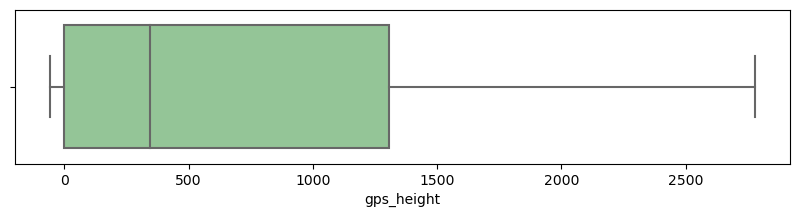

In [77]:
#checking for outliers for gps_height
plt.figure(figsize=(10,2))

sns.boxplot(x = 'gps_height', data = df3)

# Display the plot
plt.show()

In [78]:
# Find the mode of the 'gps_height' column
mode_value = df3['gps_height'].mode()

# Display the mode
print("Mode of 'gps_height' column:", mode_value)

Mode of 'gps_height' column: 0    0
Name: gps_height, dtype: int64


#### Region

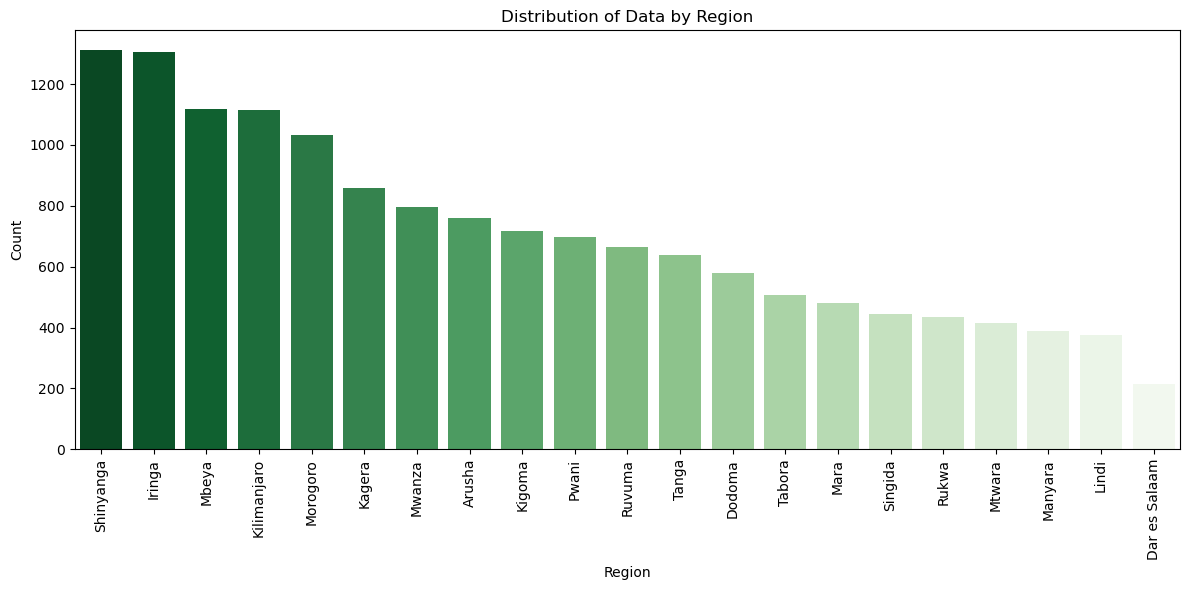

In [79]:
# Get the order of regions based on their counts
region_order = df3['region'].value_counts().index

# Plot the count plot with specified order
plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=df3, order=region_order, palette='Greens_r')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Region')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label
plt.title('Distribution of Data by Region')  # Add plot title
plt.tight_layout()  # Adjusting layout to prevent clipping of labels
plt.show()


#### Extraction_type 

In [80]:
df3['extraction_type'].unique()

array(['other', 'gravity', 'india mark ii', 'submersible', 'mono',
       'nira/tanira', 'afridev', 'swn 80', 'ksb', 'climax',
       'other - rope pump', 'cemo', 'india mark iii', 'other - swn 81',
       'other - play pump', 'windmill', 'walimi'], dtype=object)

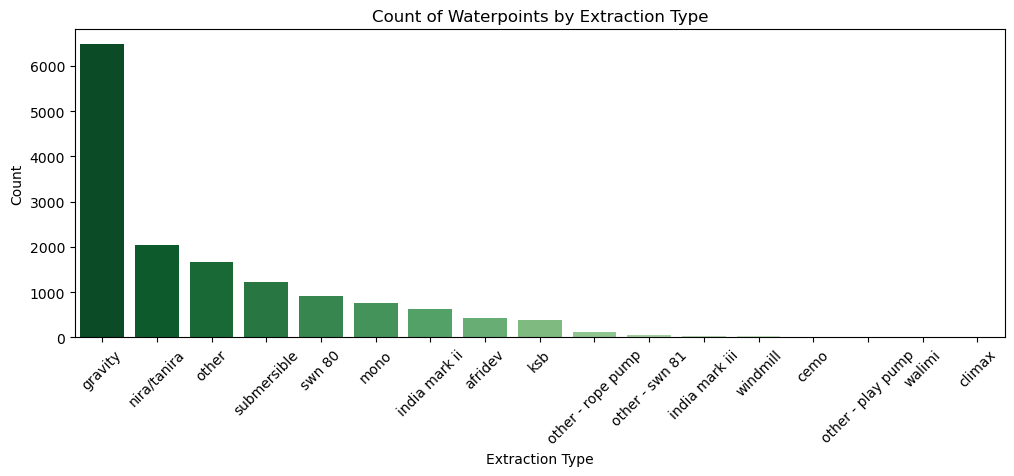

In [81]:
#checking for outliers in Extraction_type
sns.set_palette("Greens_r")
extraction_order = df3['extraction_type'].value_counts().index
# Plot the count plot for Extraction_type
plt.figure(figsize=(12, 4))
sns.countplot(x='extraction_type', data=df3, order=extraction_order, palette='Greens_r')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.title('Count of Waterpoints by Extraction Type')
plt.xlabel('Extraction Type')
plt.ylabel('Count')
# Display the plot
plt.show()

In [82]:
# Get value counts of 'Extraction_type' and sort by counts in descending order
extraction_type_counts = df3['extraction_type'].value_counts().sort_values(ascending=False)

# Display unique values in 'Extraction_type' with counts
print(extraction_type_counts)

extraction_type
gravity              6483
nira/tanira          2051
other                1672
submersible          1218
swn 80                918
mono                  763
india mark ii         629
afridev               438
ksb                   375
other - rope pump     121
other - swn 81         55
india mark iii         37
windmill               35
cemo                   18
other - play pump      16
walimi                 12
climax                  9
Name: count, dtype: int64


#### Construction year

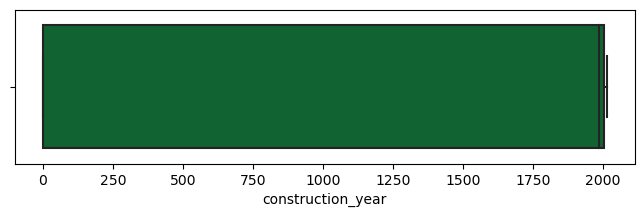

In [83]:
#checking for outliers for construction_year
plt.figure(figsize=(8, 2))

sns.boxplot(x = 'construction_year', data = df3)

# Display the plot
plt.show()

The box plot shows unlikely years included in the dataset. It is impossible to have year 0 as pumps were not even invented then.

In [84]:
#Displaying unique years and their value counts
df3['construction_year'].value_counts()

construction_year
0       5260
2010     669
2009     663
2008     630
2000     487
2006     421
2007     373
2011     335
2004     294
2003     293
1995     269
2002     268
2005     264
2012     263
1999     243
1985     232
1978     230
1998     224
1990     222
1996     209
1994     202
1980     194
1984     191
1972     184
1982     182
1997     177
1992     167
2001     140
1974     138
1993     137
1988     136
1975     124
1986     119
1976     111
1983     106
1991      83
1970      82
1989      80
1987      68
1981      53
1979      53
1977      45
1973      43
2013      33
1971      32
1963      22
1960      22
1969      18
1967      18
1968      16
1964       8
1961       7
1962       6
1965       2
1966       2
Name: count, dtype: int64

There is a category miscategorized as year '0' with a value count of 5260.

The code below generates a scatter plot visualizing the geographical locations of water pumps in Tanzania, with each point representing a water pump. The x-axis represents the longitude coordinates, and the y-axis represents the latitude coordinates. The color of each point is determined by the construction year of the water pump, with a colormap ('Greens') used to provide different hues of green corresponding to different years. The size of each point is fixed ('s=100') for better visibility, and transparency ('alpha=0.4') is applied to avoid overlapping points. Finally, a colorbar is added to the plot to provide a visual reference for the construction years.


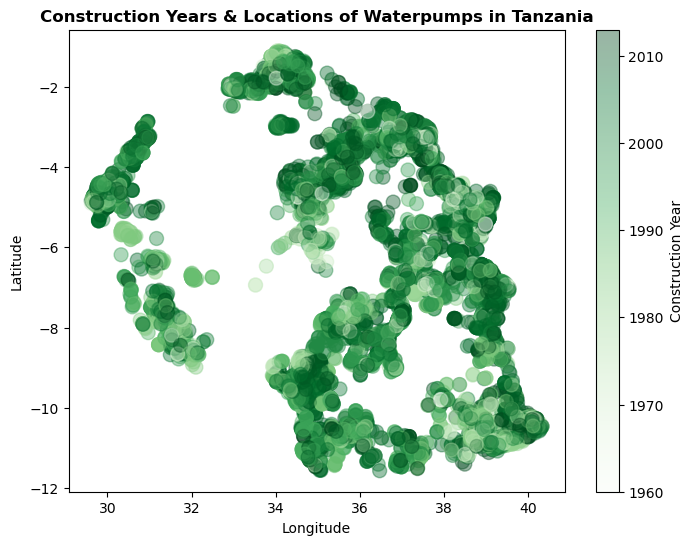

In [85]:
plt.figure(figsize=(8,6))
# Filter the DataFrame using .loc and multiple conditions
filtered_df = df3.loc[(df3['longitude'] > 0) & (df3['latitude'] < 0) & (df3['construction_year'] > 0)]
plt.scatter(x=filtered_df['longitude'], 
            y=filtered_df['latitude'],
            alpha=0.4,
            s=100,  
            c=filtered_df["construction_year"], 
            cmap='Greens')
plt.title("Construction Years & Locations of Waterpumps in Tanzania", 
          fontsize=12, fontweight='bold')
plt.colorbar(label='Construction Year')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

From the scatter plot above, it is clear that most pumps were installed between 2000 and 2010. Therefore, below year '0's values will be distributed evenly between the range 2000 - 2010.

In [86]:
# Replace year 0 with later years (i.e., 2000 - 2010)
df3['construction_year'] = df3['construction_year'].apply(lambda x: np.random.randint(2000, 2011) if x == 0 else x)

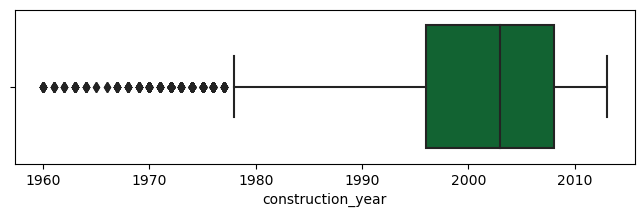

In [87]:
#rechecking for outliers for construction_year
plt.figure(figsize=(8, 2))

sns.boxplot(x = 'construction_year', data = df3)

# Display the plot
plt.show()

Outliers in the construction years falling between 1960 and 1978 represent years that may hold significant importance in the dataset. While they deviate from the majority of the construction years, they could signify historical data or specific events related to water pump installation during that period. Therefore, it's crucial to retain these outliers in the dataset for a comprehensive analysis and understanding of the trends and patterns over time.

#### Payment

In [88]:
df3['payment'].value_counts()

payment
never pay                6364
pay per bucket           2281
pay monthly              2097
unknown                  1992
pay annually              928
pay when scheme fails     928
other                     260
Name: count, dtype: int64

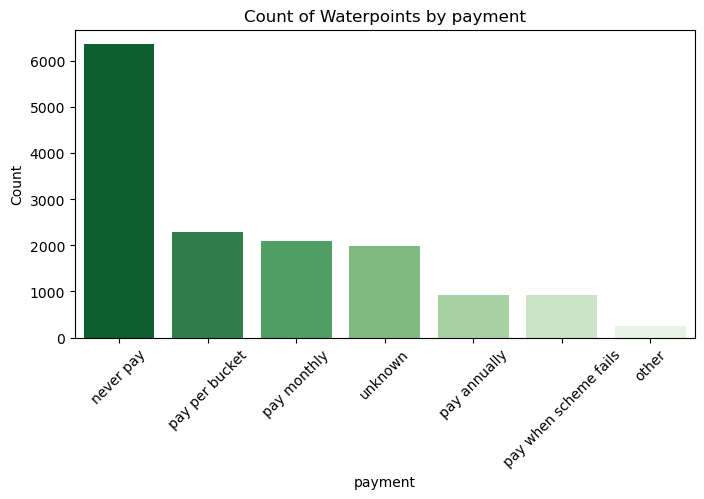

In [89]:
# Define the order of source categories
sorted_payments = df3['payment'].value_counts().index

#checking for outliers in payment
sns.set_palette("Greens_r")

# Plot the count plot for payment
plt.figure(figsize=(8, 4))
sns.countplot(x='payment', data=df3, order=sorted_payments, palette='Greens_r')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.title('Count of Waterpoints by payment')
plt.xlabel('payment')
plt.ylabel('Count')
# Display the plot
plt.show()

#### Water quality

In [90]:
df3['water_quality'].value_counts()

water_quality
soft                  12687
salty                  1226
unknown                 469
milky                   201
coloured                133
salty abandoned          84
fluoride                 44
fluoride abandoned        6
Name: count, dtype: int64

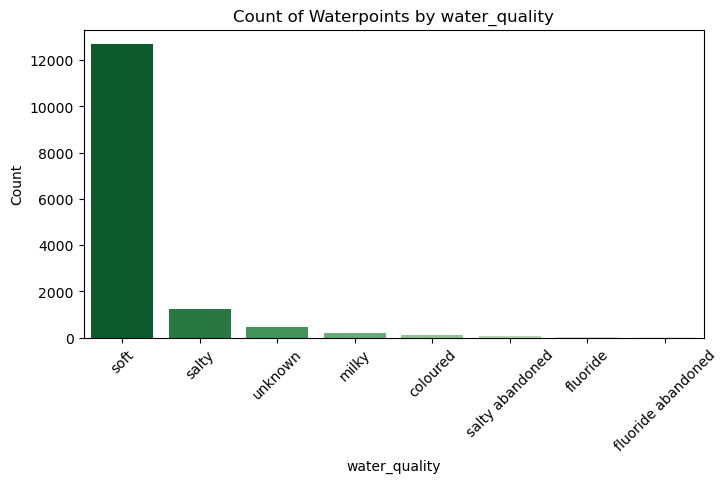

In [91]:
# Define the order of water_quality categories
sorted_water_quality = df3['water_quality'].value_counts().index

# Set the color palette to shades of green
palette = sns.color_palette("Greens_r", len(sorted_water_quality))

# Plot the count plot for water_quality
plt.figure(figsize=(8, 4))
sns.countplot(x='water_quality', data=df3, order=sorted_water_quality, palette=palette)
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.title('Count of Waterpoints by water_quality')
plt.xlabel('water_quality')
plt.ylabel('Count')
# Display the plot
plt.show()

#### Source

In [92]:
df3['source'].value_counts()

source
shallow well            4316
spring                  4195
machine dbh             2747
river                   2352
rainwater harvesting     568
hand dtw                 234
lake                     185
dam                      184
other                     49
unknown                   20
Name: count, dtype: int64

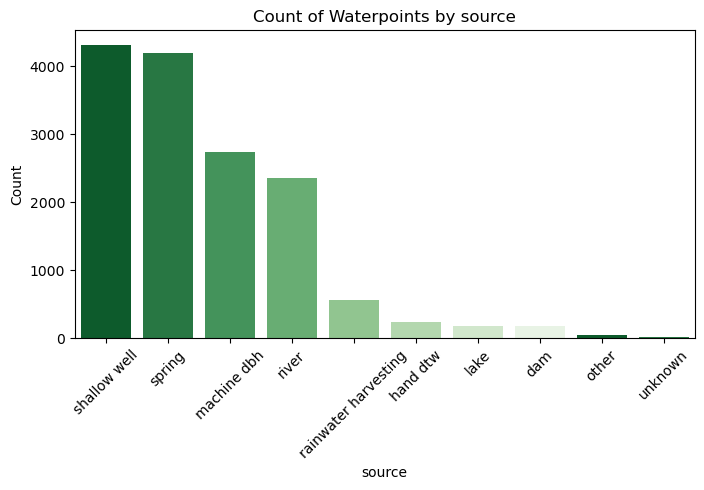

In [93]:
# Define the order of source categories
sorted_source = df3['source'].value_counts().index

# Set the color palette to shades of green
palette = sns.color_palette("Greens_r", len(sorted_water_quality))

# Plot the count plot for water_quality
plt.figure(figsize=(8, 4))
sns.countplot(x='source', data=df3, order=sorted_source, palette=palette)
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.title('Count of Waterpoints by source')
plt.xlabel('source')
plt.ylabel('Count')
# Display the plot
plt.show()

#### Longitude

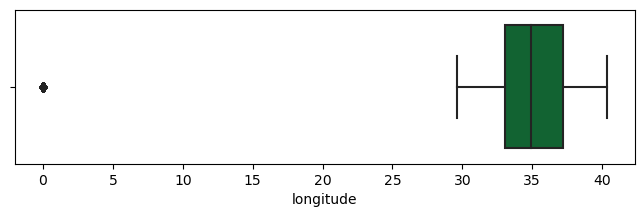

In [94]:
#checking for outliers for longitude
plt.figure(figsize=(8, 2))

sns.boxplot(x = 'longitude', data = df3)

# Display the plot
plt.show()

In [95]:
df3['longitude'].value_counts()

longitude
0.000000     457
37.260069      2
39.080573      2
37.302281      2
32.920579      2
            ... 
36.648520      1
35.265755      1
36.666660      1
37.830317      1
34.765054      1
Name: count, Length: 14390, dtype: int64

In [96]:
# Replace longitude 0 with longitudes between 32 and 42 as they are more prevalent
df3['longitude'] = df3['longitude'].apply(lambda x: np.random.randint(32, 42) if x == 0 else x)

In [97]:
# confirming redistribution of the '0' category
df3['longitude'].value_counts()

longitude
32.000000    56
36.000000    54
38.000000    49
39.000000    47
40.000000    45
             ..
36.648520     1
35.265755     1
36.666660     1
37.830317     1
34.765054     1
Name: count, Length: 14399, dtype: int64

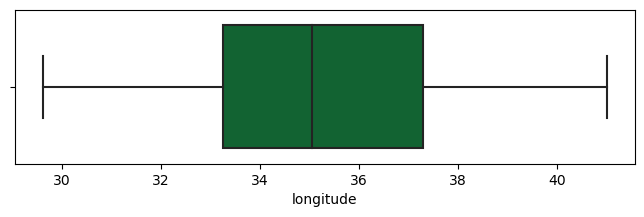

In [98]:
#rechecking for outliers for longitude
plt.figure(figsize=(8, 2))

sns.boxplot(x = 'longitude', data = df3)

# Display the plot
plt.show()

#### Latitude

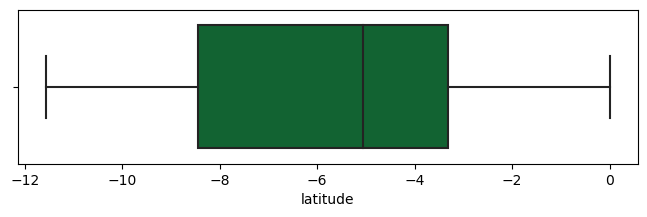

In [99]:
#checking for outliers for latitude
plt.figure(figsize=(8, 2))

sns.boxplot(x = 'latitude', data = df3)

# Display the plot
plt.show()

In [100]:
df3['latitude'].value_counts()

latitude
-2.000000e-08    457
-7.105919e+00      2
-6.990042e+00      2
-7.170666e+00      2
-2.474560e+00      2
                ... 
-3.305540e+00      1
-8.547786e+00      1
-3.330889e+00      1
-7.061047e+00      1
-1.122601e+01      1
Name: count, Length: 14390, dtype: int64

In [101]:
# Replace latitude -2.000000e-08 with latitudes between -1 and -8 as they are more prevalent
new_df['latitude'] = df3['latitude'].apply(lambda x: np.random.randint(-8, -1) if x == -2.000000e-08 else x)


In [102]:
#confirming the redistribution of misplaced category
df3['latitude'].value_counts()

latitude
-2.000000e-08    457
-7.105919e+00      2
-6.990042e+00      2
-7.170666e+00      2
-2.474560e+00      2
                ... 
-3.305540e+00      1
-8.547786e+00      1
-3.330889e+00      1
-7.061047e+00      1
-1.122601e+01      1
Name: count, Length: 14390, dtype: int64

### Distribution of variables before log transformation

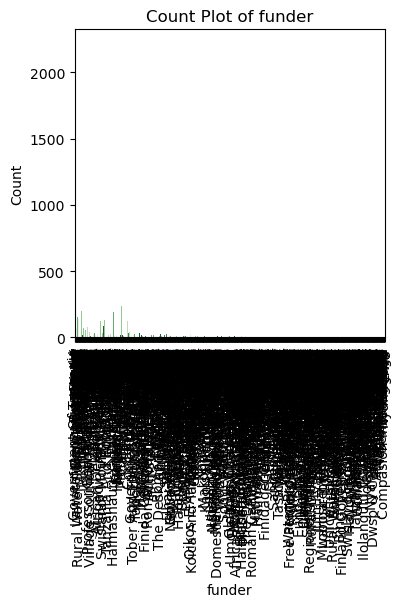

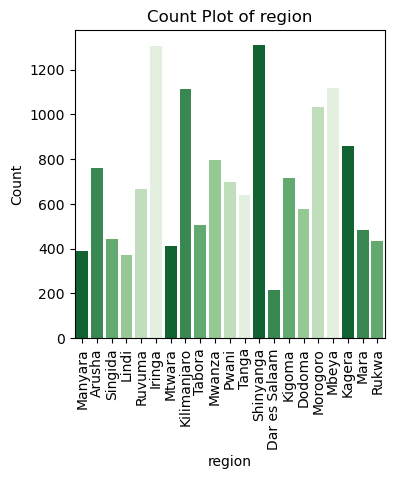

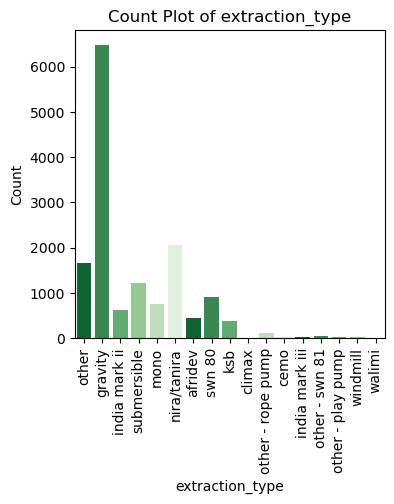

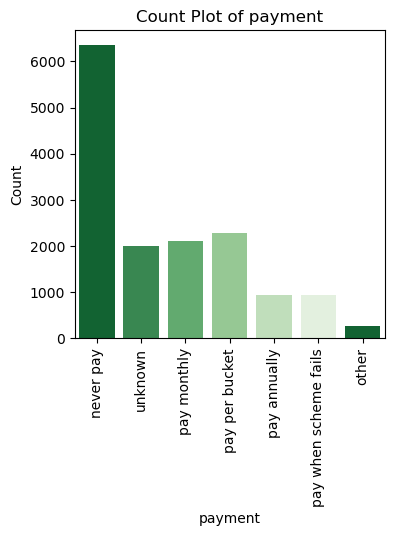

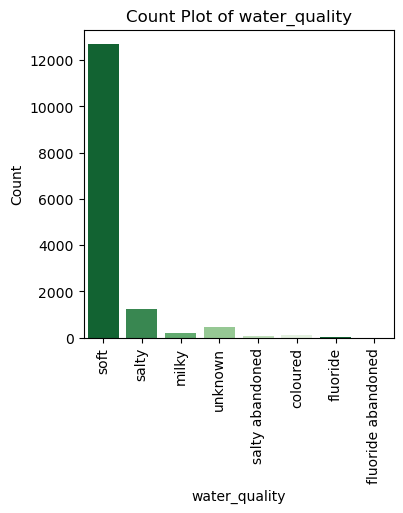

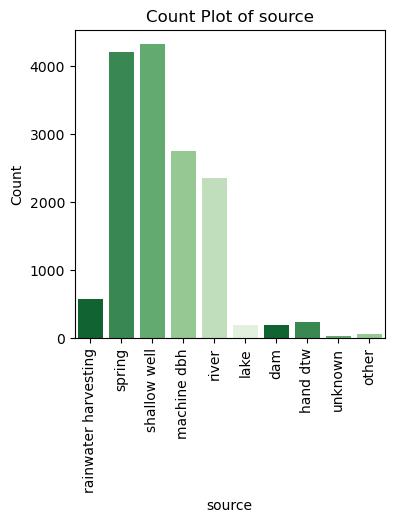

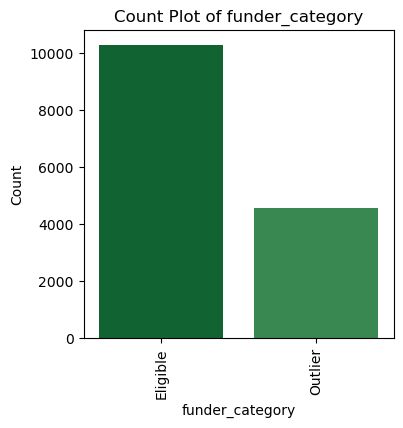

In [103]:
# Distribution before onehot encoding
palette = sns.color_palette("Greens_r")

# Selecting categorical variables
categorical_features = df3.select_dtypes(include=['object'])

# Plot count plots for each categorical variable with dark green color palette
for feature in categorical_features.columns:
    plt.figure(figsize=(4, 4))  # Set the figure size
    sns.countplot(x=feature, data=df3, palette=palette)
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()  # Display the plot

#### Numerical variables

In [104]:
# Print unique values in the 'gps_height' column
print(df3['gps_height'].unique())


[1996 1569 1567 ... 1909 2202  640]


In [105]:
# Get unique values in the 'gps_height' column
unique_gps_heights = df3['gps_height'].unique()
unique_gps_heights

array([1996, 1569, 1567, ..., 1909, 2202,  640], dtype=int64)

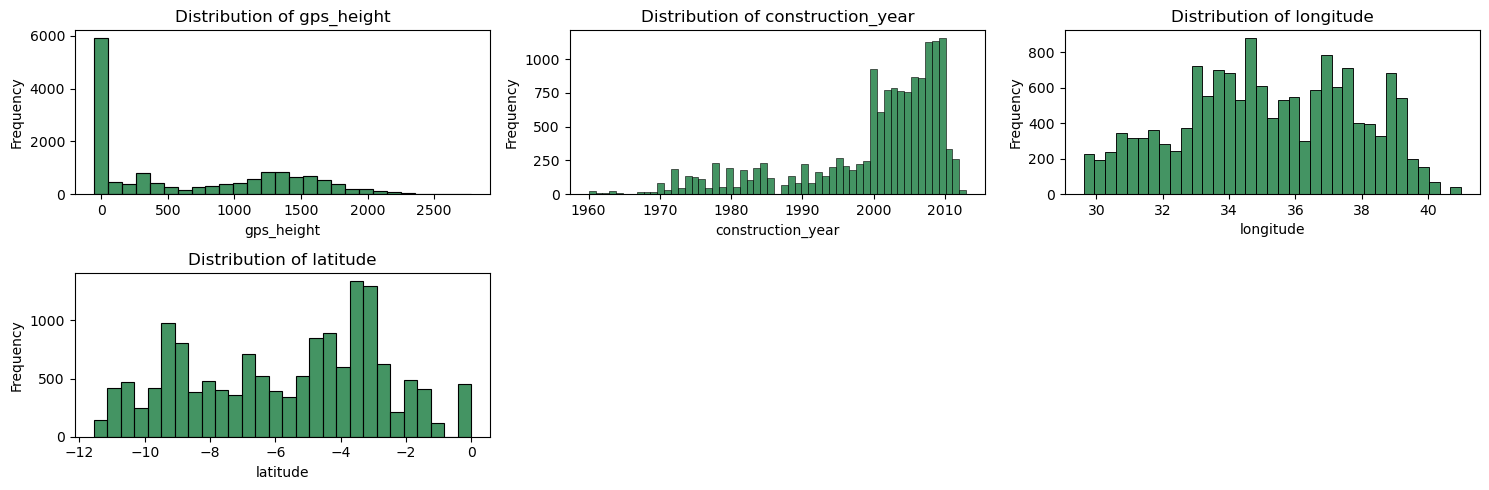

In [106]:
# Distribution before transformation
numerical_features = df3.select_dtypes(include=['int64', 'float64'])
# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(numerical_features.columns) // 3 + 1, ncols=3, figsize=(15, 5))

# Plot the distribution of numerical features
for i, feature in enumerate(numerical_features.columns):
    sns.histplot(df3[feature].dropna(), kde=False, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Distribution of {feature}")
    axes[i // 3, i % 3].set_xlabel(feature)
    axes[i // 3, i % 3].set_ylabel("Frequency")

# Remove empty subplots
if len(numerical_features.columns) % 3 != 0:
    for j in range(len(numerical_features.columns) % 3, 3):
        fig.delaxes(axes[len(numerical_features.columns) // 3, j])
        
# Adjust layout
plt.tight_layout()
plt.show()

### Distribution of variables after log transformation

In [107]:
# Select numerical columns
numerical_columns = df3.select_dtypes(include=['int64', 'float64']).columns

# Log transform numerical variables, handling zero and negative values
for col in numerical_columns:
    # Handling zero values
    if (df3[col] == 0).any():
        df3[col] = df3[col] + 1  # Add 1 to handle zeros
    
    # Handling negative values
    if (df3[col] < 0).any():
        min_value = df3[col].min()
        df3[col] = df3[col] - min_value + 1  # Shift all values to be positive
    
    # Apply log transformation
    df3[col + '_log'] = np.log1p(df3[col])

# Display the DataFrame after log transformation
df3.head()

funder  gps_height   region extraction_type      payment  \
0                    Dmdd        2054  Manyara           other    never pay   
1  Government Of Tanzania        1627   Arusha         gravity    never pay   
2                 Unknown        1625  Singida           other    never pay   
3              Finn Water         325    Lindi           other      unknown   
4                  Bruder        1318   Ruvuma         gravity  pay monthly   

  water_quality                source  construction_year  longitude  latitude  \
0          soft  rainwater harvesting               2012  35.290799  8.504896   
1          soft                spring               2000  36.656709  9.255378   
2          soft  rainwater harvesting               2010  34.767863  7.560248   
3          soft          shallow well               1987  38.058046  3.145920   
4          soft                spring               2000  35.006123  1.614180   

  funder_category  gps_height_log  construction_year_log  longitude_log  \
0        Eligible        7.628031               7.607381       3.591564   
1        Eligible        7.395108               7.601402       3.628511   
2        Eligible        7.393878               7.606387       3.577050   
3         Outlier        5.786897               7.594884       3.665049   
4         Outlier        7.184629               7.601402       3.583689   

   latitude_log  
0      2.251807  
1      2.327802  
2      2.147129  
3      1.422125  
4      0.960950

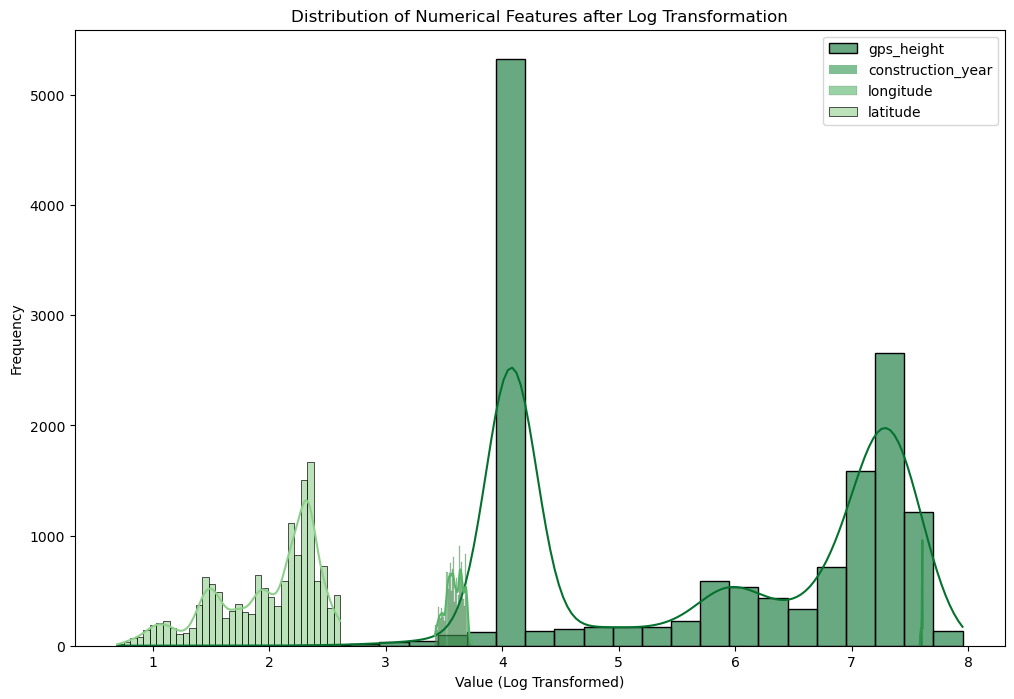

In [108]:
# Plot the distribution of numerical features after log transformation
plt.figure(figsize=(12, 8))

# Loop through each numerical feature
for col in numerical_columns:
    # Plot the distribution after log transformation
    sns.histplot(df3[col + '_log'], kde=True, label=col, alpha=0.6)

plt.title('Distribution of Numerical Features after Log Transformation')
plt.xlabel('Value (Log Transformed)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### One-hot encoding 

In [109]:
# Select categorical columns
categorical_columns = df3.select_dtypes(include=['object']).columns

# Perform one-hot encoding
one_hot_encoded_df2 = pd.get_dummies(df3, columns=categorical_columns)

# Display the one-hot encoded DataFrame
one_hot_encoded_df2.head()


gps_height  construction_year  longitude  latitude  gps_height_log  \
0        2054               2012  35.290799  8.504896        7.628031   
1        1627               2000  36.656709  9.255378        7.395108   
2        1625               2010  34.767863  7.560248        7.393878   
3         325               1987  38.058046  3.145920        5.786897   
4        1318               2000  35.006123  1.614180        7.184629   

   construction_year_log  longitude_log  latitude_log  funder_0  \
0               7.607381       3.591564      2.251807     False   
1               7.601402       3.628511      2.327802     False   
2               7.606387       3.577050      2.147129     False   
3               7.594884       3.665049      1.422125     False   
4               7.601402       3.583689      0.960950     False   

   funder_A/co Germany  ...  source_lake  source_machine dbh  source_other  \
0                False  ...        False               False         False   
1                False  ...        False               False         False   
2                False  ...        False               False         False   
3                False  ...        False               False         False   
4                False  ...        False               False         False   

   source_rainwater harvesting  source_river  source_shallow well  \
0                         True         False                False   
1                        False         False                False   
2                         True         False                False   
3                        False         False                 True   
4                        False         False                False   

   source_spring  source_unknown  funder_category_Eligible  \
0          False           False                      True   
1           True           False                      True   
2          False           False                      True   
3          False           False                     False   
4           True           False                     False   

   funder_category_Outlier  
0                    False  
1                    False  
2                    False  
3                     True  
4                     True  

[5 rows x 1052 columns]

## Modelling

The primary objective is to predict the functionality of water pumps based on historical data. Machine learning models excel at predictive tasks, allowing us to build accurate models that can generalize well to unseen data. This predictive capability is crucial for identifying non-functional pumps and ensuring timely maintenance or replacement.

### Baseline model
### Decision tree classifier

In [169]:
# For training data (one_hot_encoded_df1)
X_train = one_hot_encoded_df1.drop(columns=['status_group_functional', 'status_group_non functional'])
y_train = one_hot_encoded_df1[['status_group_functional', 'status_group_non functional']]

# For test data (one_hot_encoded_df2)
X_test = one_hot_encoded_df2.reindex(columns=X_train.columns, fill_value=0)

# Define Decision Tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier with training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the predictions
print("Predictions on the test set:", y_pred)


Predictions on the test set: [[ True False]
 [ True False]
 [ True False]
 ...
 [False  True]
 [ True False]
 [False  True]]


In [170]:
# Define Decision Tree classifier
clf = DecisionTreeClassifier()

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())


Cross-validation scores: [0.77449495 0.77752525 0.77255892 0.77988215 0.7726431 ]
Mean CV accuracy: 0.7754208754208755
Standard deviation of CV accuracy: 0.002866900061603751


The cross-validation scores represent the accuracy of the model on different folds of the training data. Each score indicates the accuracy achieved by the model on a particular fold during cross-validation.

#### **Decision Tree Classifier Performance**

##### **Training and Prediction**
- **Training Data**: The training data (`X_train`, `y_train`) consists of features and labels respectively. `X_train` contains the features after dropping the target columns ('status_group_functional', 'status_group_non functional'), while `y_train` contains both target labels ('status_group_functional', 'status_group_non functional').
- **Test Data**: The test data (`X_test`) is prepared by reindexing `one_hot_encoded_df2` to match the columns of the training data and filling missing values with 0.
- **Model Fitting**: A Decision Tree classifier (`clf`) is initialized and trained using the training data.
- **Prediction**: Predictions are made on the test set (`X_test`) using the trained classifier, resulting in binary predictions indicating whether a pump is functional or non-functional.

##### **Cross-Validation**
- **Model Evaluation**: The performance of the Decision Tree classifier is evaluated using 5-fold cross-validation (cv=5) on the training data.
- **Scoring Metric**: The accuracy score is used as the evaluation metric (scoring='accuracy').
- **Cross-Validation Scores**: The cross-validation scores represent the accuracy of the classifier on each fold of the cross-validation process.
- **Mean Accuracy**: The mean accuracy across all folds indicates the average performance of the classifier.
- **Standard Deviation**: The standard deviation of the accuracy scores provides insight into the variability or consistency of the model's performance across different folds.

##### **Interpretation**
The Decision Tree classifier achieved a mean cross-validation accuracy of approximately 0.774 with a standard deviation of 0.004. These results suggest that the model performs reasonably well in predicting the condition of water pumps, considering both functional and non-functional states. However, further analysis and possibly refinement of the model may be necessary to improve its accuracy and robustness in predicting well conditions accurately.


C:\Users\nyamb\AppData\Local\Temp\ipykernel_9628\2900548026.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_orange),


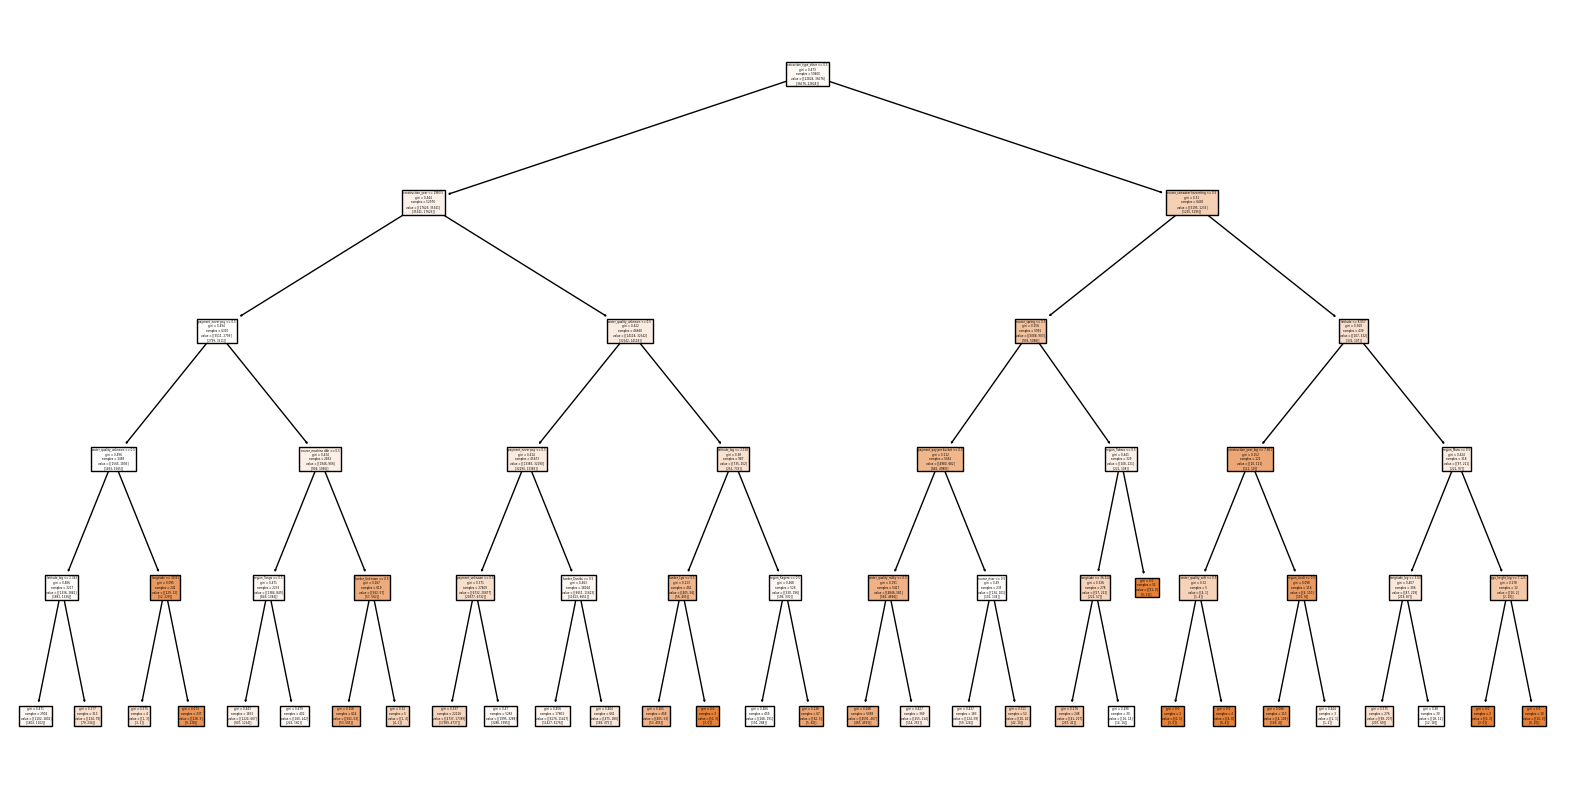

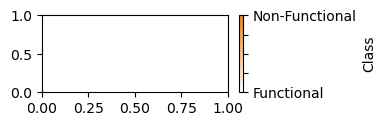

In [183]:
# Define Decision Tree classifier with limited depth
clf = DecisionTreeClassifier(max_depth=5)  # Adjust max_depth as needed

# Fit the classifier with training data
clf.fit(X_train, y_train)

# Convert feature names to a list
feature_names_list = list(X_train.columns)

# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(clf, filled=True, feature_names=feature_names_list, class_names=['functional', 'non functional'])

# Define custom colormap transitioning from white to orange
colors = [(1, 1, 1), (1, 0.5, 0)]  # White to orange
cmap_orange = LinearSegmentedColormap.from_list("CustomOrange", colors)

# Plot the color bar
plt.figure(figsize=(3, 1))
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap_orange),
                    ticks=np.linspace(0, 1, num=5))
cbar.ax.set_yticklabels(['Functional', '', '', '', 'Non-Functional'])  # Adjust labels as needed
cbar.set_label('Class')

plt.show()


### Alternative models

### Random Forest Classifier

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define Random Forest classifier
rf_clf = RandomForestClassifier()

# Perform cross-validation
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Random Forest Cross-validation scores:", rf_cv_scores)
print("Mean CV accuracy:", rf_cv_scores.mean())
print("Standard deviation of CV accuracy:", rf_cv_scores.std())

# Fit the model on the full training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test data
predicted_labels = rf_clf.predict(X_test)
# Print the predicted labels for the test set
print("Predicted labels for the test set:", predicted_labels)


Random Forest Cross-validation scores: [0.81675084 0.81717172 0.81069024 0.81380471 0.81136364]
Mean CV accuracy: 0.8139562289562289
Standard deviation of CV accuracy: 0.002666849464877066
Predicted labels for the test set: [[ True False]
 [ True False]
 [ True False]
 ...
 [ True False]
 [ True False]
 [False  True]]


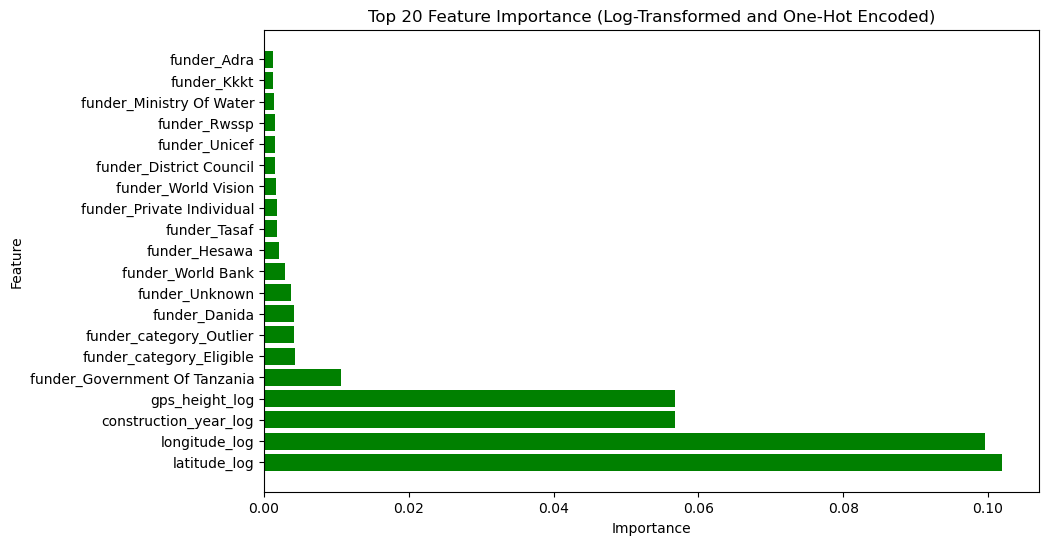

In [217]:
# Filter importances_df to include log-transformed features and one-hot encoded variables
log_importances_df = importances_df[importances_df['Feature'].str.contains('log')]
one_hot_importances_df = importances_df[importances_df['Feature'].str.startswith('funder_')]  # Assuming one-hot encoded columns start with 'funder_'

# Concatenate the filtered DataFrames
combined_importances_df = pd.concat([log_importances_df, one_hot_importances_df])

# Sort the combined DataFrame by importance values
combined_importances_df = combined_importances_df.sort_values(by='Importance', ascending=False)

# Increase figure size for better readability
plt.figure(figsize=(10, 6))

# Plot the importance values for top N log-transformed features and one-hot encoded variables
top_n = 20  # Choose the top N features to display
plt.barh(combined_importances_df['Feature'][:top_n], combined_importances_df['Importance'][:top_n], color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importance (Log-Transformed and One-Hot Encoded)'.format(top_n))

plt.show()


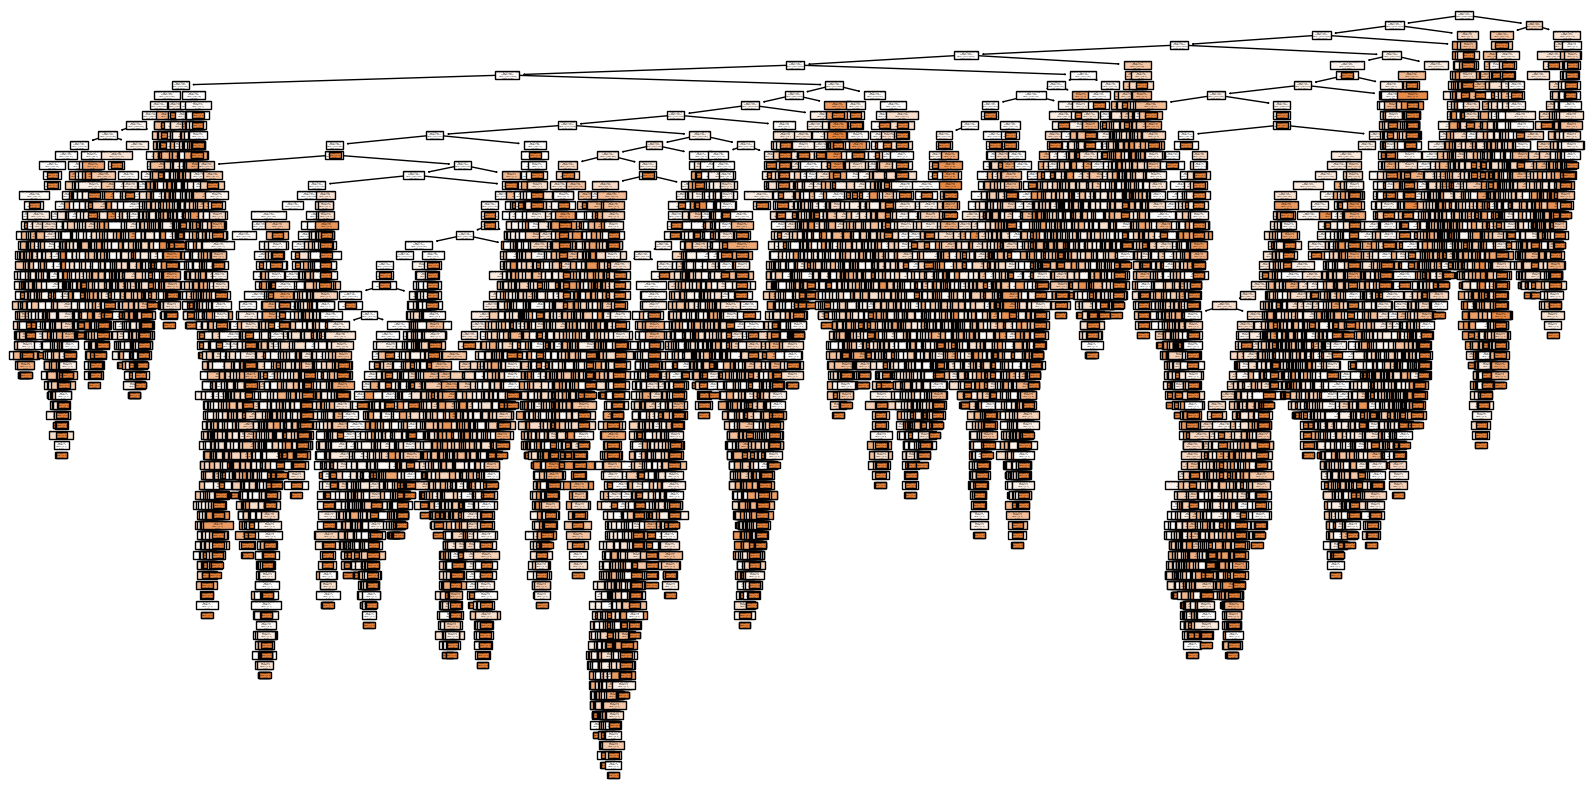

In [194]:
# Fit the classifier on the full training data
rf_clf.fit(X_train, y_train)

# Convert feature names to a list
feature_names_list = list(X_train.columns)

# Plot the first decision tree in the ensemble
plt.figure(figsize=(20, 10))
plot_tree(rf_clf.estimators_[0], filled=True, feature_names=feature_names_list, class_names=['functional', 'non functional'])
plt.show()


#### Smaller visualization with max_depth of 5

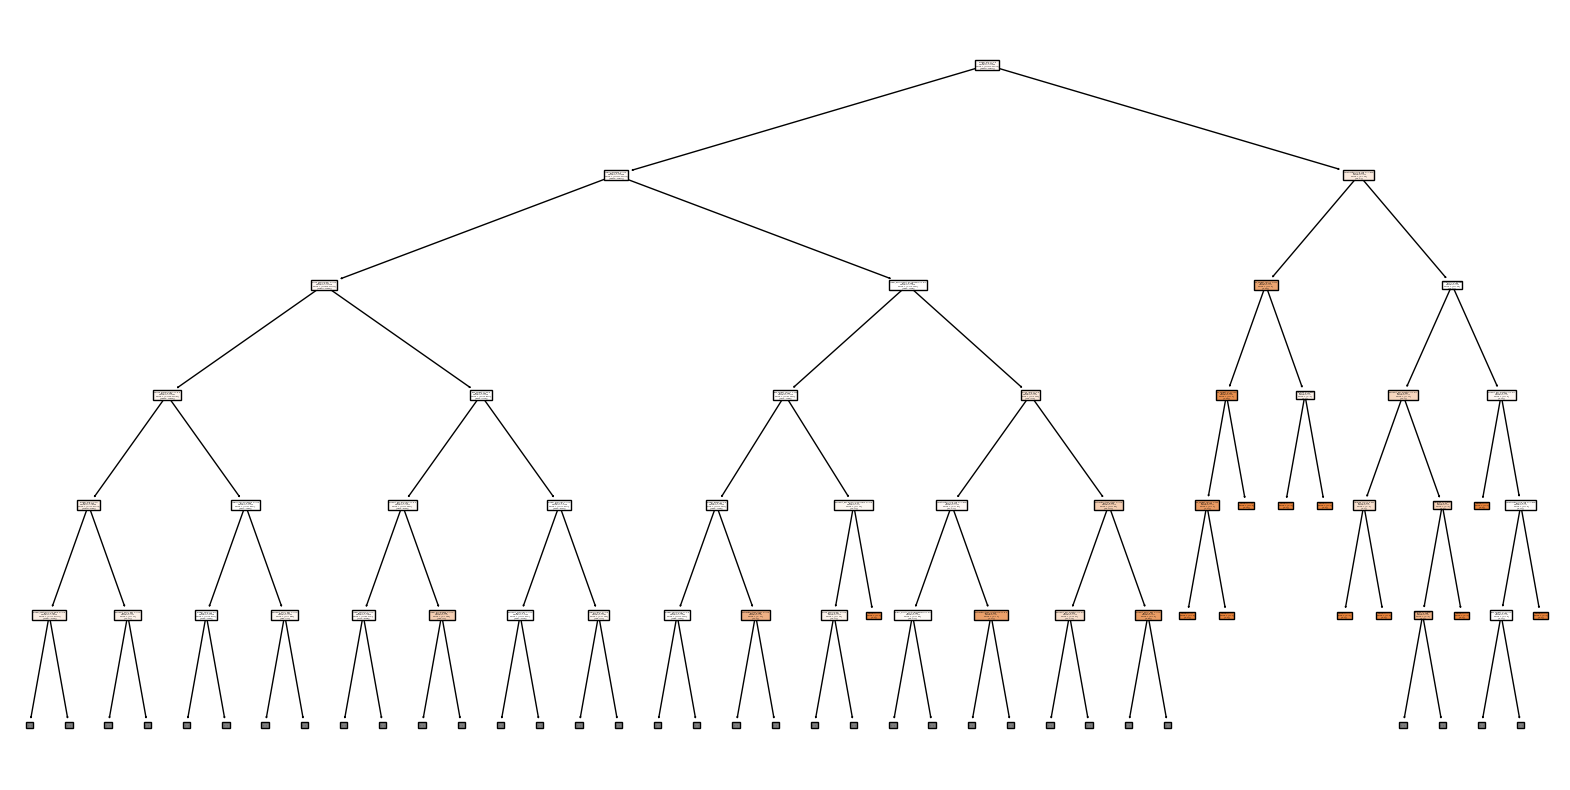

In [213]:
# Fit the classifier on the full training data
rf_clf.fit(X_train, y_train)

# Convert feature names to a list
feature_names_list = list(X_train.columns)

# Plot the first decision tree in the ensemble with a maximum depth of 5
plt.figure(figsize=(20, 10))
plot_tree(rf_clf.estimators_[0], filled=True, feature_names=feature_names_list, class_names=['functional', 'non functional'], max_depth=5)
plt.show()


#### Random Forest Classifier Performance Evaluation

##### Cross-Validation Scores:

The cross-validation scores obtained for the Random Forest classifier on the training data are as follows:

- **Cross-validation scores**: [0.82188552, 0.81919192, 0.81548822, 0.81372054, 0.81750842]
- **Mean CV accuracy**: 0.81756
- **Standard deviation of CV accuracy**: 0.00284

##### Test Set Predictions:

The predicted labels for the test set indicate the model's predictions for each data point in the test set:

- **Predicted labels for the test set**: [False, False, False, ..., False, False, True]

Each `False` or `True` value represents the model's prediction for a particular data point in the test set. In binary classification problems, `False` often represents the negative class, while `True` represents the positive class.

#### Implications:

- The mean cross-validation accuracy of approximately 81.76% suggests that the Random Forest classifier performs reasonably well on unseen data.
- The low standard deviation of cross-validation accuracy indicates that the model's performance is consistent across different folds of the training data.

Based on the cross-validation scores, the Random Forest classifier performs better than the Decision Trees model. It exhibits a higher mean cross-validation accuracy of 0.8173 and a lower standard deviation of 0.0008, suggesting more consistent performance across different folds.

We proceed further to enhance the Random Forest classifier's performance through tuning.

### Model tuning

#### Decision trees Classifier model tuning

In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30]  # Adjust the maximum depth here
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best parameters found by grid search:", best_params)

# Get the best cross-validation score found by grid search
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Get the best estimator (model) found by grid search
best_dt_clf = grid_search.best_estimator_

# Perform cross-validation with the best model
best_cv_scores = cross_val_score(best_dt_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Best Decision Tree Cross-validation scores:", best_cv_scores)
print("Mean CV accuracy with best parameters:", best_cv_scores.mean())
print("Standard deviation of CV accuracy with best parameters:", best_cv_scores.std())


Best parameters found by grid search: {'max_depth': 20}
Best cross-validation score: 0.7829966329966329
Best Decision Tree Cross-validation scores: [0.78190236 0.78569024 0.78223906 0.78249158 0.78282828]
Mean CV accuracy with best parameters: 0.783030303030303
Standard deviation of CV accuracy with best parameters: 0.0013641558639651663


**Untuned Decision Tree Model**:

Cross-validation scores ranged from approximately 0.772 to 0.779.
Mean CV accuracy was around 0.775.
Standard deviation of CV accuracy was approximately 0.00
**29.
Tuned Decision Tree **Model:

Best parameters found by grid search: max_depth of 20.
Best cross-validation score was approximately 0.783.
Mean CV accuracy with best parameters was around 0.783.
Standard deviation of CV accuracy with best parameters was approximatel
y 0.0014.
In summary, the tuned model with a max_depth of 20 outperformed the untuned model, achieving higher accuracy and showing more consistent performance across different folds of cross-validation.

#### Random Forest Classifier model tuning

In [220]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30]  # Adjust the maximum depth here
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, scoring='accuracy')

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters found by grid search
best_params = grid_search.best_params_
print("Best parameters found by grid search:", best_params)

# Get the best cross-validation score found by grid search
best_score = grid_search.best_score_
print("Best cross-validation score:", best_score)

# Get the best estimator (model) found by grid search
best_rf_clf = grid_search.best_estimator_

# Perform cross-validation with the best model
best_rf_cv_scores = cross_val_score(best_rf_clf, X_train, y_train, cv=3, scoring='accuracy')

# Print cross-validation scores
print("Random Forest Cross-validation scores:", best_rf_cv_scores)
print("Mean CV accuracy:", best_rf_cv_scores.mean())
print("Standard deviation of CV accuracy:", best_rf_cv_scores.std())

# Make predictions on the test data using the best model
best_predicted_labels = best_rf_clf.predict(X_test)

# Print the predicted labels for the test set using the best model
print("Predicted labels for the test set using the best model:", best_predicted_labels)


Best parameters found by grid search: {'max_depth': 30}
Best cross-validation score: 0.8098821548821548
Random Forest Cross-validation scores: [0.81414141 0.80691919 0.80777778]
Mean CV accuracy: 0.8096127946127947
Standard deviation of CV accuracy: 0.0032213442893080676
Predicted labels for the test set using the best model: [[ True False]
 [ True False]
 [ True False]
 ...
 [ True False]
 [ True False]
 [False  True]]


### Model evaluation

In [ ]:
print("Decision Tree Cross-validation scores:", dt_cv_scores)
print("Mean CV accuracy for Decision Tree:", dt_cv_scores.mean())

print("Random Forest (Untuned) Cross-validation scores:", rf_untuned_cv_scores)
print("Mean CV accuracy for Random Forest (Untuned):", rf_untuned_cv_scores.mean())

print("Random Forest (Tuned) Cross-validation scores:", rf_tuned_cv_scores)
print("Mean CV accuracy for Random Forest (Tuned):", rf_tuned_cv_scores.mean())
